# Initialization- libraries, Levenshtein, etc...

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
from dateutil.parser import parse 
import nltk 
from rapidfuzz import process, fuzz #Levenshtein Distance Calculation

import ipywidgets as widgets
from IPython.display import display

import random as rm


In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
 
f = open('Job_Desc/JobDescr2.txt', 'r')
d = open('Resumes/ResumeSample3.txt', 'r')

#Splits values in txt file into list
data = f.read()
split_job = data.split()
split_job[:] = (value for value in split_job if value != '\t')

data = d.read()
split_resume = data.split()
split_resume[:] = (value for value in split_resume if value != '\t')

#Remove stopwords
resume_tokens_without_sw = [word for word in split_resume if not word in stopwords.words()]
ad_tokens_without_sw = [word for word in split_job if not word in stopwords.words()]



#Calculate the Levenshtein distance
"""
    The Levenshtein distance is a string metric for measuring the difference
    between two sequences.
    It is calculated as the minimum number of single-character edits necessary to
    transform one string into another.
    """
Levenshtein = fuzz.token_set_ratio(resume_tokens_without_sw, ad_tokens_without_sw)
print(Levenshtein)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.3636363636363598


In [19]:
print("Resume Tokens'\n'", resume_tokens_without_sw,'\n')
print("Ad Tokens'\n'", ad_tokens_without_sw)

Resume Tokens'
' ['Tim', 'Janssen', 'Software', 'Engineer', '202-555-0110', 'tjanssen_zety@gmail.com', 'linkedin.com/in/tjanssen_zety', 'Diligent', 'software', 'engineer', '5+', 'years', 'experience', 'commercial', 'application', 'development.', 'Eager', 'join', 'Cyclone', 'Inc.', 'build', 'innovative', 'cutting', 'edge', 'business', 'solutions', 'impressive', 'suite', 'clients', 'within', 'global', 'reach.', 'In', 'previous', 'roles,', 'slashed', 'downtime', '25%', 'ensured', '98%', 'on-time', 'project', 'completion.', 'Also', 'identified', 'dealt', 'significant', 'process', 'bottleneck', 'boosted', 'coding', 'efficiency', '35%', 'resolved.', 'Education', 'Bachelor', 'Computer', 'Science', 'Carnegie', 'Mellon', 'University', '2012–2015', 'Heavy', 'focus', 'full', 'stack', 'engineering', 'modules', 'front', 'back', 'processes.', 'Built', 'mock', 'payment', 'system', 'Android', 'ecommerce', 'app', 'senior', 'year', 'project.', 'Skills', 'Adaptability', 'Teamwork', 'Agile', 'frameworks',

In [ ]:
import sys
sys.stdout = open('Token.txt', 'w')


print("Resume Tokens", resume_tokens_without_sw)
print("Ad Tokens", ad_tokens_without_sw)

sys.stdout.close()



## Optimal MDP Game

Stochastic

In [119]:


# defines the reward/connection graph
#Accept, decline, continue, other candidate
#Edu, ski, exp, cert, ref
RP = np.array([[100, -.25,  .50, .50], 
              [ 100, -.25, .66, .5],
              [ 100, -.5,  .33, 100],
              [.66,  .33,  .5, .5 ],
              [ 0, -.33, .5, .5]]).astype("float32")

RN = np.array([[0, .33,  .66, .66],
              [ 0, .66, .33, 100],
              [ -.33, .33,  .33, 100],
              [0,  .33,  0, .66 ],
              [ -.33, 0, .66, 100]]).astype("float32")


Lev = Levenshtein

if (Lev > 50):
    r = RP
    print("IN RP") 
else:
    r = RN
    print("IN RN")


q = np.zeros_like(r)

gamma = 0.8
alpha = 1.
n_episodes = 50
n_states = 5
n_actions = 4
epsilon = 0.05
random_state = np.random.RandomState(1999)

state_grid = [[0 for i in range(n_states)] for i in range(n_actions)] #2States x 3 Actions
reward_grid = [[0 for i in range(n_states)] for i in range(n_actions)] #2States x 3 Actions


def state_space(s):
    if(s == 0):
        print("In State Education")
    elif(s == 1):
        print("In State Skills")
    elif(s == 2):
        print("In State Experience")
    elif(s == 3):
        print("In State Certifications")
    elif(s == 4):
        print("In State Referrals")        
    return


def action_space(a):
    if(a == 0):
        print("Action: Accept Qualifications")
    elif(a == 1):
        print("Action: Decline Qualifications")
    elif(a == 2):
        print("Action: Review Qualifications")
    elif(a == 3):
        print("Action: Examine Other Candidates")
    return
        
        
def update_q(state, new_state, action):
    
    q[state, action] = q[state, action] + alpha * (r[state, action] + gamma * max(q[new_state, :]) - q[state, action])
    return r[state, action]


def mdp():
    for e in range(int(n_episodes)):
        print("--------------------------episode--------------------------", e)

        states = list(range(n_states))

        print("states", states)

        random_state.shuffle(states) #shuffles order of states
        curr_state = states[0] #assigns current state as a random state

        goal = False

        print("current_state", curr_state) 
        
        prob = rm.uniform(0, 1)
        print(prob)

        if (prob > .2):
            state = curr_state 
            print("In STATE", state)
        else:
            if(prob > .7): 
                curr_state = rm.randint(3,5) 
                print("In STATE", curr_state)
            else:
                curr_state = rm.randint(1,5)
                print("In STATE", curr_state)

            print("current_state", curr_state)
        
        if (curr_state == 0):  
            print("STATE 1")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
                
        if (curr_state == 1):  
            print("STATE 2")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
        if (curr_state == 2):  
            print("STATE 3")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
        if (curr_state == 3):  
            print("STATE 4")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
        if (curr_state == 4):  
            print("STATE 5")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state

   
    print(q)
    #show_traverse()
    #show_q()
    
mdp()

IN RN
--------------------------episode-------------------------- 0
states [0, 1, 2, 3, 4]
current_state 1
0.2567512857045998
In STATE 1
STATE 2
r[current_state] [  0.     0.66   0.33 100.  ]
EXPLOITING
EXPLOITING ACTION PERFORMED 0
In State Education
value 0.0
r[current_state] [0.   0.33 0.66 0.66]
EXPLOITING
EXPLOITING ACTION PERFORMED 0
In State Education
value 0.0
r[current_state] [0.   0.33 0.66 0.66]
EXPLOITING
EXPLOITING ACTION PERFORMED 3
In State Certifications
value 0.66
r[current_state] [0.   0.33 0.   0.66]
EXPLOITING
EXPLOITING ACTION PERFORMED 1
In State Skills
value 0.33
r[current_state] [  0.     0.66   0.33 100.  ]
EXPLOITING
EXPLOITING ACTION PERFORMED 3
In State Certifications
value 100.0
STATE 4
--------------------------episode-------------------------- 1
states [0, 1, 2, 3, 4]
current_state 4
0.133397884498067
In STATE 3
current_state 3
STATE 4
r[current_state] [0.   0.33 0.   0.66]
EXPLOITING
In State Skills
value 0.33
r[current_state] [  0.     0.66   0.33 100. 

In State Certifications
value 100.0
STATE 4
--------------------------episode-------------------------- 20
states [0, 1, 2, 3, 4]
current_state 4
0.862478194177459
In STATE 4
STATE 5
r[current_state] [ -0.33   0.     0.66 100.  ]
EXPLOITING
In State Education
value -0.33
r[current_state] [0.   0.33 0.66 0.66]
EXPLOITING
In State Certifications
value 0.66
r[current_state] [0.   0.33 0.   0.66]
EXPLOITING
In State Skills
value 0.33
r[current_state] [  0.     0.66   0.33 100.  ]
EXPLOITING
In State Certifications
value 100.0
--------------------------episode-------------------------- 21
states [0, 1, 2, 3, 4]
current_state 1
0.5448066413393715
In STATE 1
STATE 2
r[current_state] [  0.     0.66   0.33 100.  ]
EXPLOITING
In State Certifications
value 100.0
STATE 4
--------------------------episode-------------------------- 22
states [0, 1, 2, 3, 4]
current_state 2
0.7194122656661784
In STATE 2
STATE 3
r[current_state] [ -0.33   0.33   0.33 100.  ]
EXPLOITING
In State Certifications
value 10

                    Accept      Reject  Continue   Candidate
Education         0.000000    0.000000  0.000000  179.169479
Skills          140.768082  223.396576  0.000000  278.510071
Experience        0.000000    0.000000  1.634782  278.487396
Certifications    0.000000  223.137589  0.000000    0.000000
Referrals       143.003708    0.000000  0.000000    0.000000


<IPython.core.display.Javascript object>


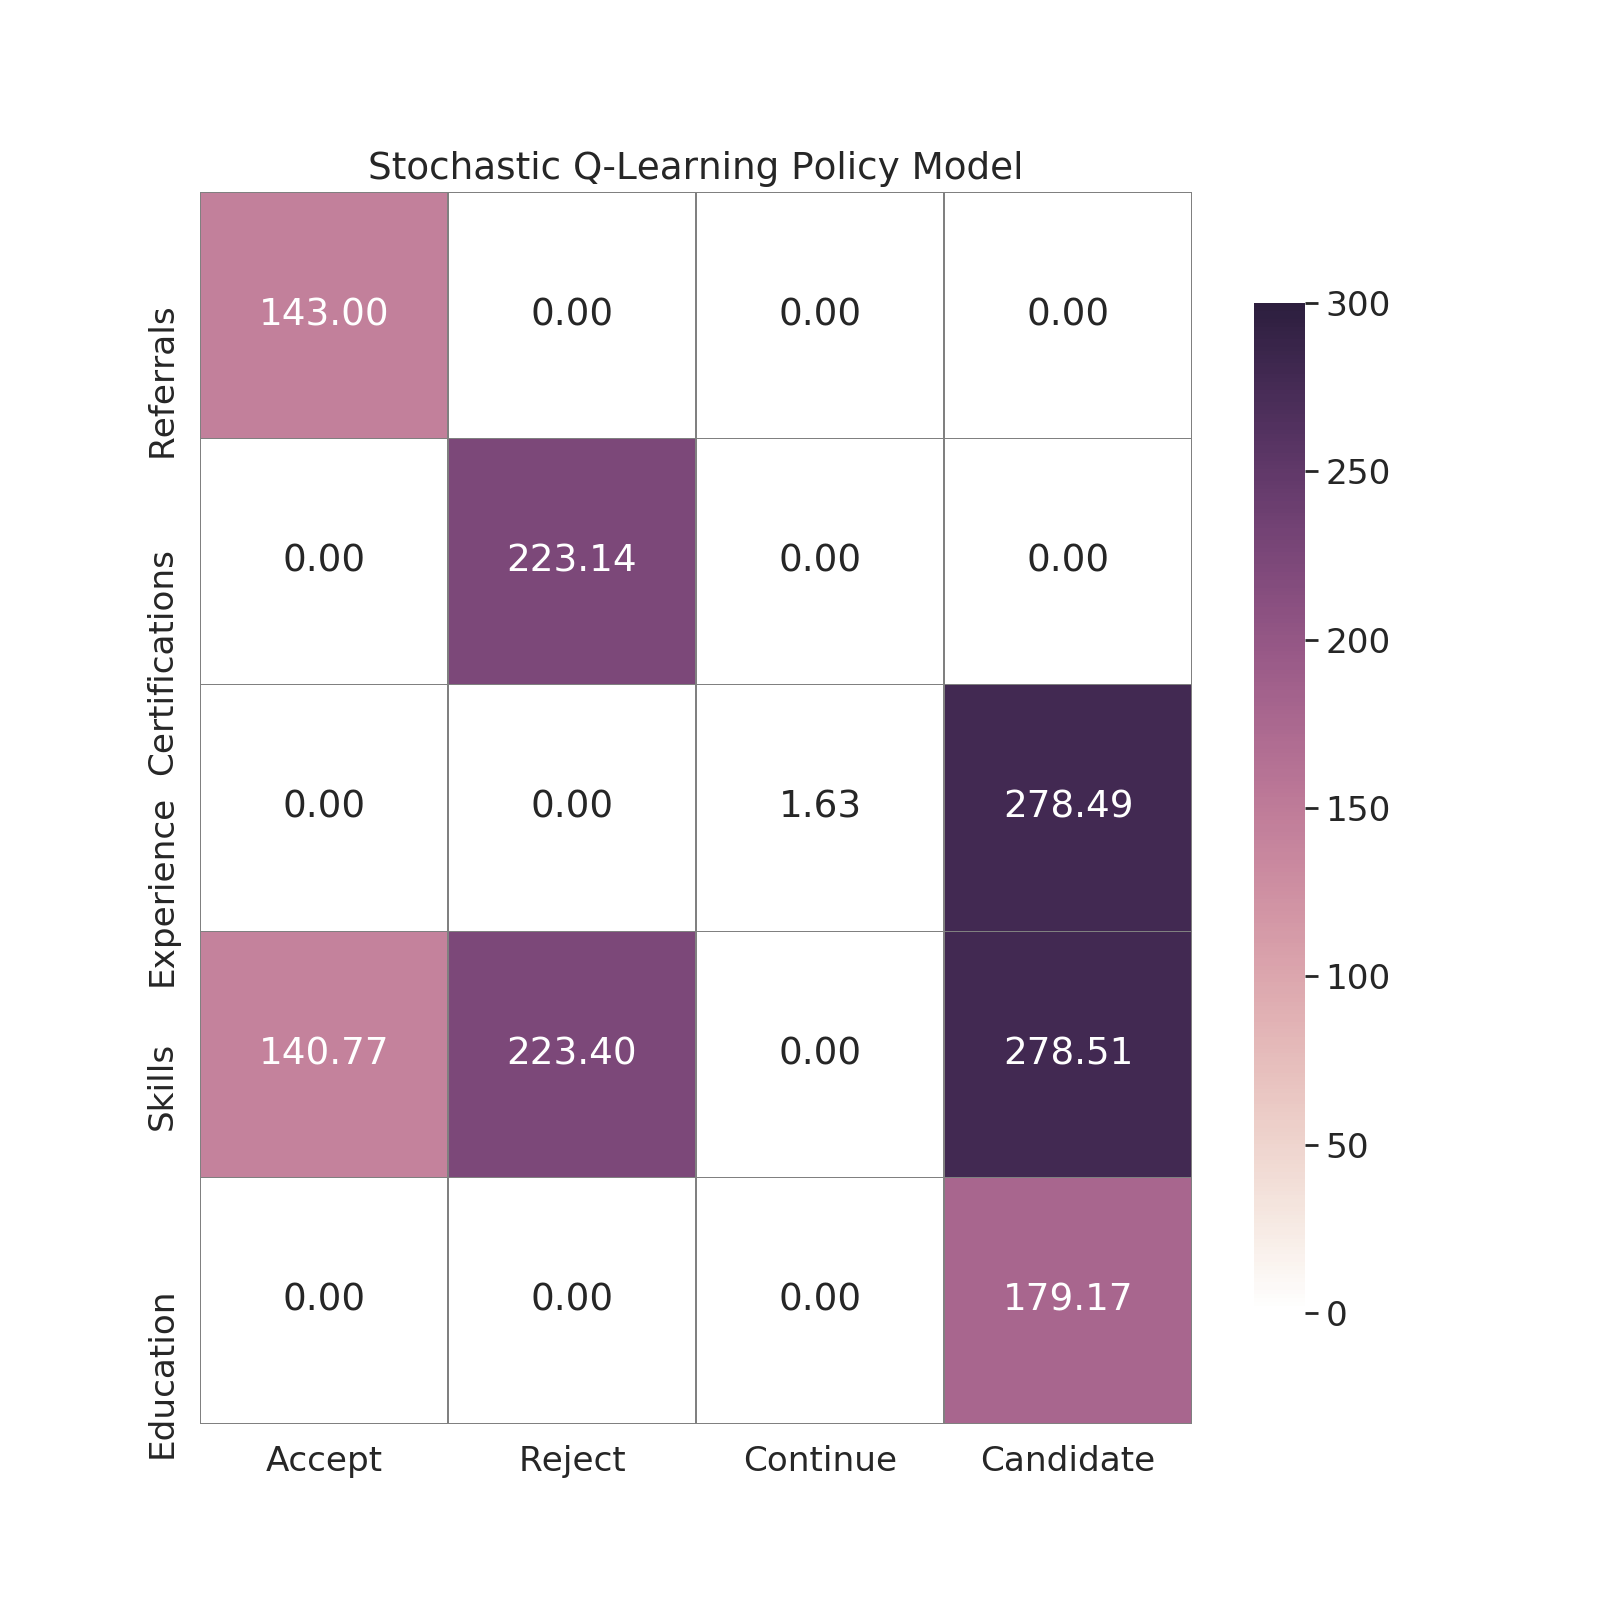

In [120]:
#Heat Map
data = q.tolist()

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=300.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Stochastic Q-Learning Policy Model')

plt.savefig('Stochastic_Q_Learning_Policy_Model.png', bbox_inches='tight')              
plt.show()

<IPython.core.display.Javascript object>


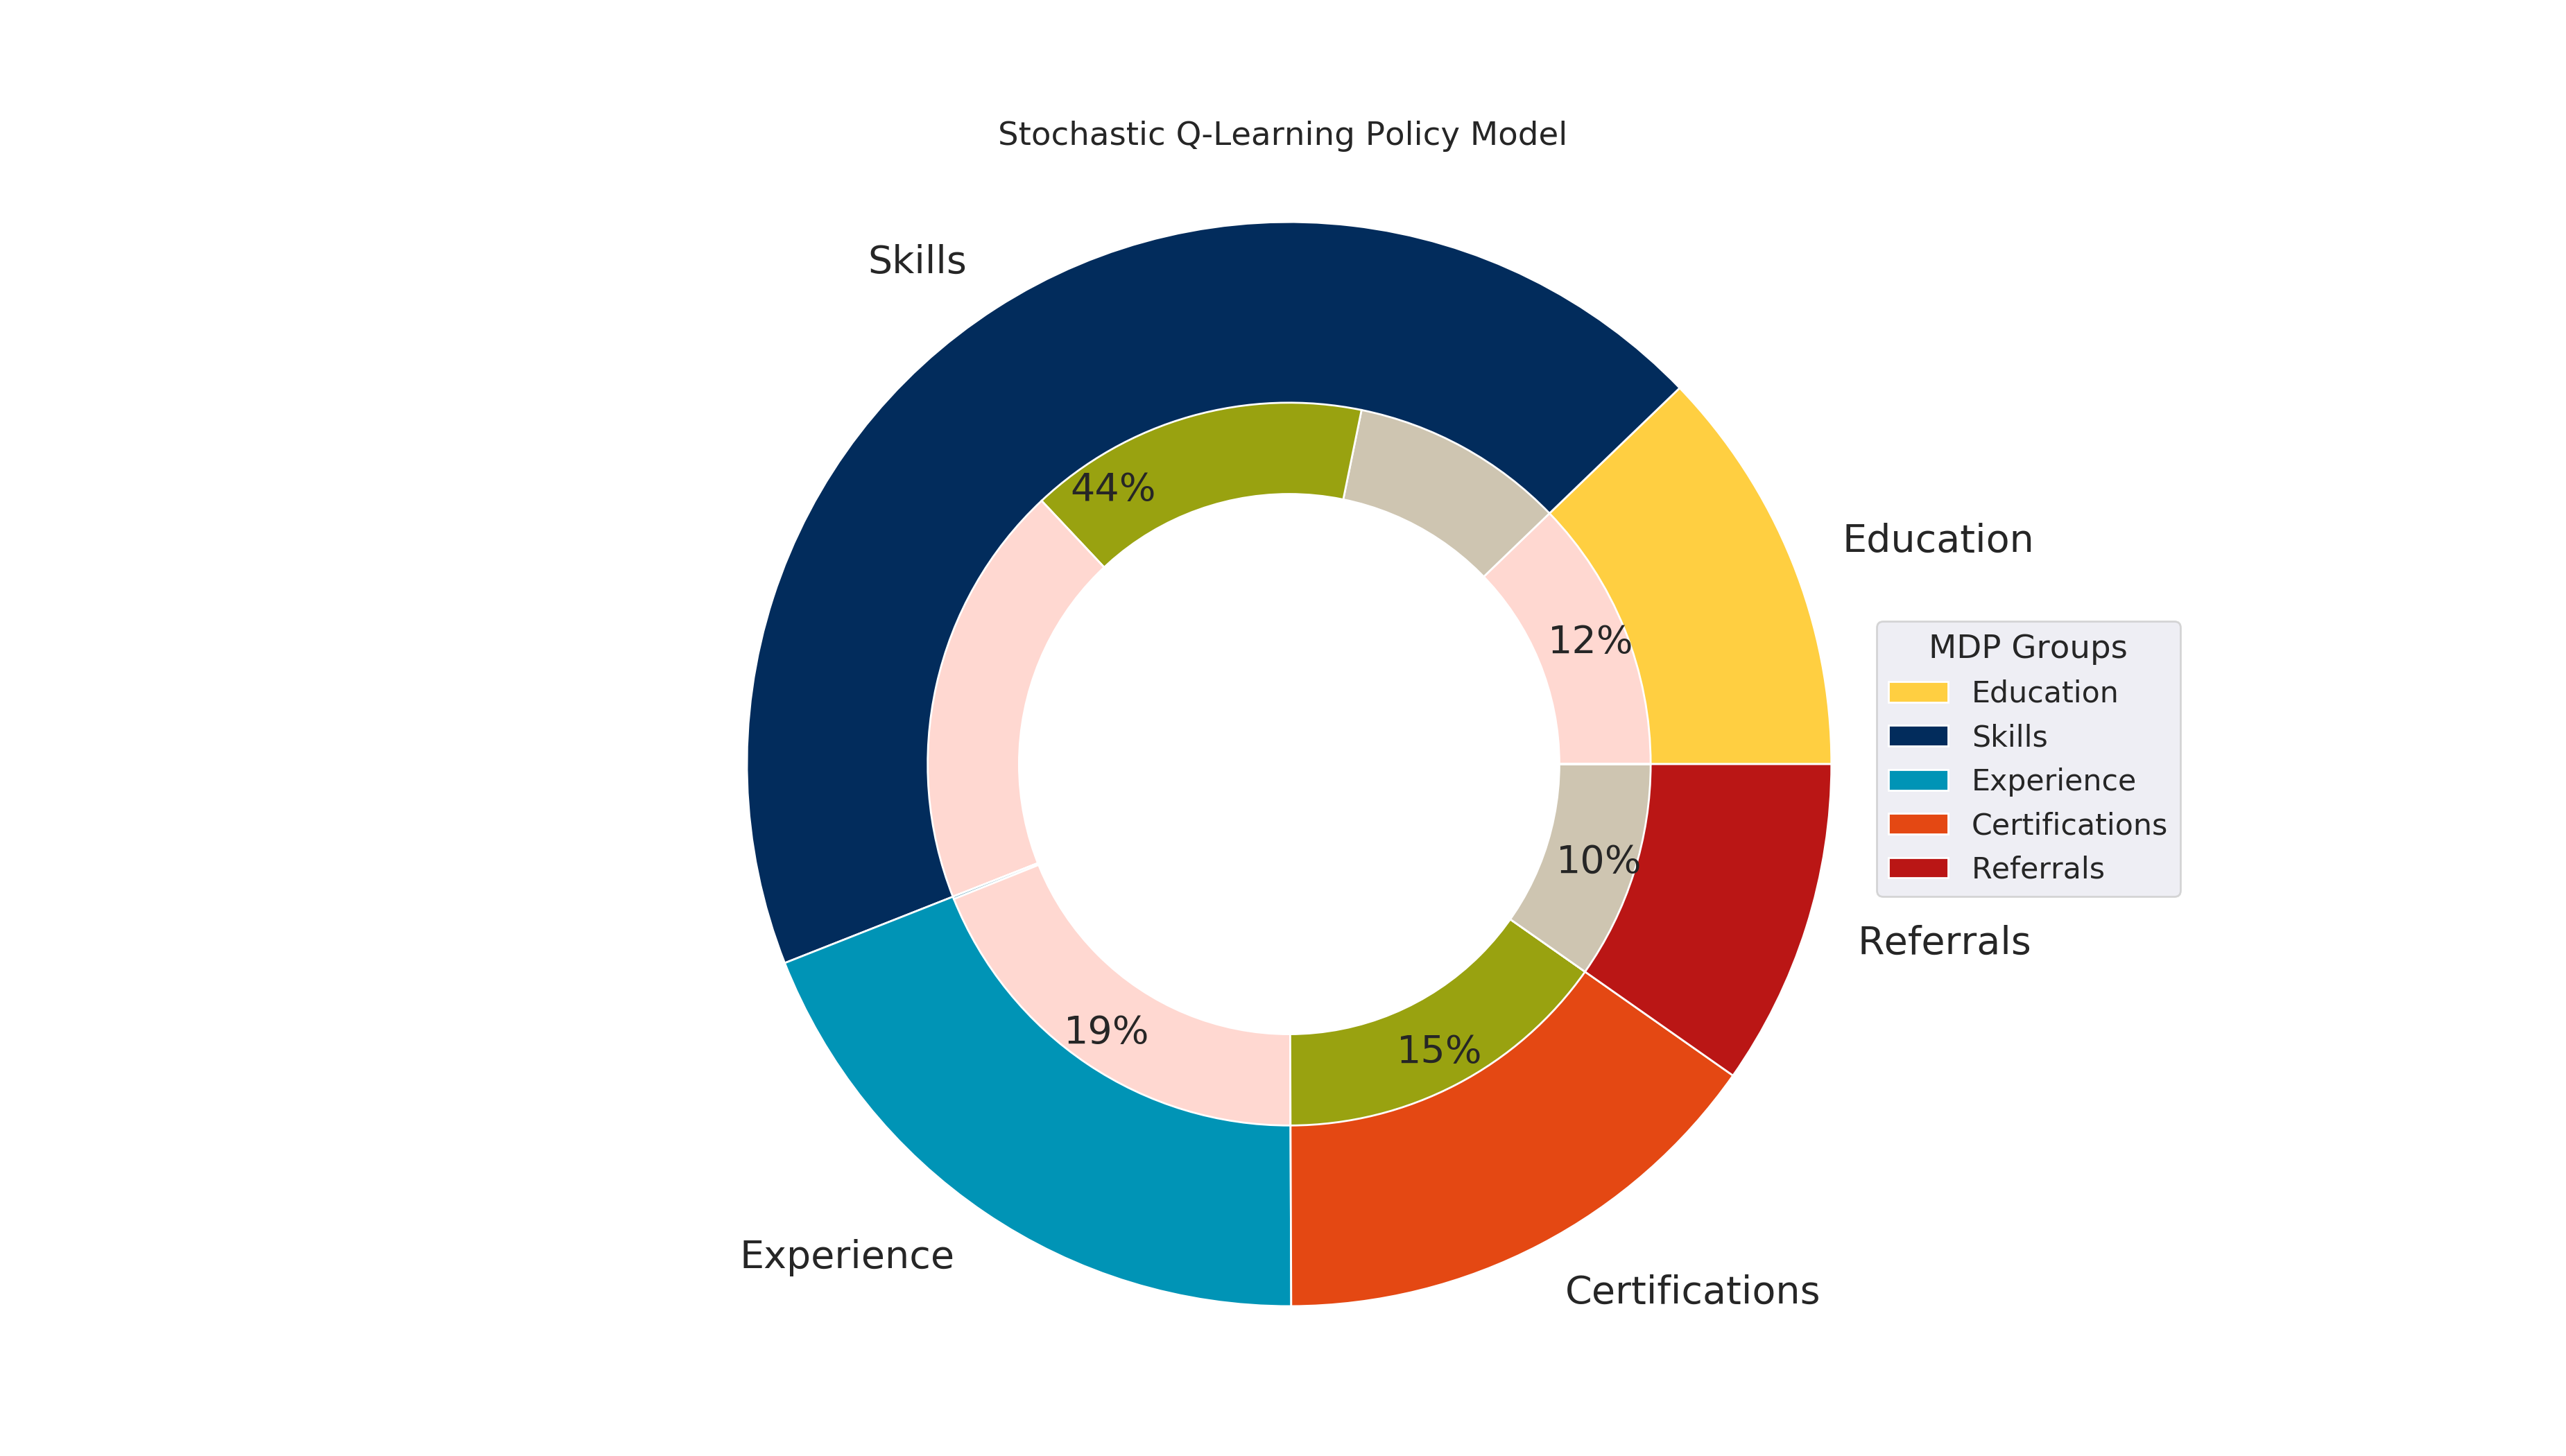

[[0.0, 0.0, 0.0, 179.1694793701172], [140.76808166503906, 223.39657592773438, 0.0, 278.51007080078125], [0.0, 0.0, 1.6347815990447998, 278.4873962402344], [0.0, 223.13758850097656, 0.0, 0.0], [143.0037078857422, 0.0, 0.0, 0.0]]


In [121]:
##### Donut Chart
fig, ax = plt.subplots()

size = 1.75
vals = np.array(data)
print(data)

topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 




colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Stochastic Q-Learning Policy Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Stochastic_Q_Learning_Hiring_Modeling_Pie.png', )

plt.show()

Deterministic

In [122]:


# defines the reward/connection graph
RP = np.array([[.33, .33,  1, 1],
              [ .5, .5, 1, 1],
              [ 10, .33,  .33, 1],
              [.33,  .33,  1, 1 ],
              [ 0, .33, 1, 1]]).astype("float32")

RN = np.array([[.33, .33,  1, 0],
              [ .75, .5, 1, 1],
              [ 10, .33,  .33, 1],
              [.33,  .33,  .75, 1 ],
              [ 0, 0, 1, 1]]).astype("float32")


Lev = Levenshtein
if (Lev > 50):
    r = RP
    print("IN RP")
else:
    r = RN
    print("IN RN")


q = np.zeros_like(r)

gamma = 0.8
alpha = 1.
n_episodes = 100
n_states = 5
n_actions = 4
epsilon = 0.05
random_state = np.random.RandomState(1999)

state_grid = [[0 for i in range(n_states)] for i in range(n_actions)] #2States x 3 Actions
reward_grid = [[0 for i in range(n_states)] for i in range(n_actions)] #2States x 3 Actions


def state_space(s):
    if(s == 0):
        print("In State Education")
    elif(s == 1):
        print("In State Skills")
    elif(s == 2):
        print("In State Experience")
    elif(s == 3):
        print("In State Certifications")
    elif(s == 4):
        print("In State Referrals")        
    return


def action_space(a):
    if(a == 0):
        print("Action: Accept Qualifications")
    elif(a == 1):
        print("Action: Decline Qualifications")
    elif(a == 2):
        print("Action: Review Qualifications")
    elif(a == 3):
        print("Action: Examine Other Candidates")
    return
        
        
def update_q(state, new_state, action):
    
    q[state, action] = q[state, action] + alpha * (r[state, action] + gamma * max(q[new_state, :]) - q[state, action])
    return r[state, action]


def mdp():
    for e in range(int(n_episodes)):
        print("--------------------------episode--------------------------", e)

        states = list(range(n_states))

        print("states", states)

        random_state.shuffle(states) #shuffles order of states
        curr_state = states[0] #assigns current state as a random state

        goal = False

        print("current_state", curr_state)    
        if (curr_state == 0):  
            print("STATE 1")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
                
        if (curr_state == 1):  
            print("STATE 2")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
        if (curr_state == 2):  
            print("STATE 3")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
        if (curr_state == 3):  
            print("STATE 4")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state
                
        if (curr_state == 4):  
            print("STATE 5")

            while not goal: 
                # epsilon greedy
                valid_moves = r[curr_state] >= 0
                print("r[current_state]", r[curr_state])

                if rm.uniform(0, 1) < epsilon: #Explore
                    print("EXPLORING")
                    actions = np.array(list(range(n_actions)))
                    random_state.shuffle(actions)
                    action = actions[0]
                    print("EXPLORING ACTION PERFORMED", action)
                    new_state = action #choose random action

                    print("next_state1", new_state)
                    state_space(new_state)

                else: #Exploit Q table
                    print("EXPLOITING")
                    if np.sum(q[curr_state]) > 0:
                        action = np.argmax(q[curr_state]) #action is the max of the q-val in the current state
                    else:
                        # Don't allow invalid moves at the start
                        # Just take a random move
                        actions = np.array(list(range(n_actions)))
                        random_state.shuffle(actions)
                        action = actions[0]
                        print("EXPLOITING ACTION PERFORMED", action)


                    new_state = action
                    state_space(new_state)

                value = update_q(curr_state, new_state, action)
                print("value", value)
                
                # Goal state has reward 100
                if value > 1:
                    goal = True
                curr_state = new_state

   
    print(q)
    #show_traverse()
    #show_q()
    
mdp()

IN RN
--------------------------episode-------------------------- 0
states [0, 1, 2, 3, 4]
current_state 1
STATE 2
r[current_state] [0.75 0.5  1.   1.  ]
EXPLOITING
EXPLOITING ACTION PERFORMED 0
In State Education
value 0.75
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
EXPLOITING ACTION PERFORMED 0
In State Education
value 0.33
r[current_state] [0.33 0.33 1.   0.  ]
EXPLORING
EXPLORING ACTION PERFORMED 3
next_state1 3
In State Certifications
value 0.0
r[current_state] [0.33 0.33 0.75 1.  ]
EXPLOITING
EXPLOITING ACTION PERFORMED 1
In State Skills
value 0.33
r[current_state] [0.75 0.5  1.   1.  ]
EXPLOITING
In State Education
value 0.75
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Education
value 0.33
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Education
value 0.33
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Education
value 0.33
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Education
value 0.33
r[current_state] [0.33 0.33 1.  

current_state 4
STATE 5
r[current_state] [0. 0. 1. 1.]
EXPLOITING
In State Experience
value 1.0
r[current_state] [10.    0.33  0.33  1.  ]
EXPLOITING
In State Education
value 10.0
--------------------------episode-------------------------- 40
states [0, 1, 2, 3, 4]
current_state 3
STATE 4
r[current_state] [0.33 0.33 0.75 1.  ]
EXPLOITING
In State Skills
value 0.33
r[current_state] [0.75 0.5  1.   1.  ]
EXPLOITING
In State Education
value 0.75
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Experience
value 1.0
r[current_state] [10.    0.33  0.33  1.  ]
EXPLOITING
In State Education
value 10.0
--------------------------episode-------------------------- 41
states [0, 1, 2, 3, 4]
current_state 3
STATE 4
r[current_state] [0.33 0.33 0.75 1.  ]
EXPLOITING
In State Skills
value 0.33
r[current_state] [0.75 0.5  1.   1.  ]
EXPLOITING
In State Education
value 0.75
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Experience
value 1.0
r[current_state] [10.    0.33  0.33  1.  ]

states [0, 1, 2, 3, 4]
current_state 3
STATE 4
r[current_state] [0.33 0.33 0.75 1.  ]
EXPLOITING
In State Skills
value 0.33
r[current_state] [0.75 0.5  1.   1.  ]
EXPLOITING
In State Education
value 0.75
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Experience
value 1.0
r[current_state] [10.    0.33  0.33  1.  ]
EXPLOITING
In State Education
value 10.0
--------------------------episode-------------------------- 84
states [0, 1, 2, 3, 4]
current_state 1
STATE 2
r[current_state] [0.75 0.5  1.   1.  ]
EXPLOITING
In State Education
value 0.75
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Experience
value 1.0
r[current_state] [10.    0.33  0.33  1.  ]
EXPLOITING
In State Education
value 10.0
--------------------------episode-------------------------- 85
states [0, 1, 2, 3, 4]
current_state 0
STATE 1
r[current_state] [0.33 0.33 1.   0.  ]
EXPLOITING
In State Experience
value 1.0
r[current_state] [10.    0.33  0.33  1.  ]
EXPLOITING
In State Education
value 10.0
----

In [123]:
print(q)
print(grid2)

[[ 1.6495718  0.        24.999996  13.543997 ]
 [20.749996   0.         0.         0.       ]
 [29.999996   0.        24.329996   0.       ]
 [ 0.        16.929996   0.         0.       ]
 [ 0.        16.59515   24.999996   0.       ]]
[[2, 2, 1, 1], [1, 2, 1, 1], [0, 2, 0, 1], [1, 3, 0, 1], [3, 1, 4, 1]]


### 3 Visualizations of Q MDP (Heat Map, Donut Pie, Radial Plots

                   Accept     Reject   Continue  Candidate
Education        1.649572   0.000000  24.999996  13.543997
Skills          20.749996   0.000000   0.000000   0.000000
Experience      29.999996   0.000000  24.329996   0.000000
Certifications   0.000000  16.929996   0.000000   0.000000
Referrals        0.000000  16.595150  24.999996   0.000000


<IPython.core.display.Javascript object>


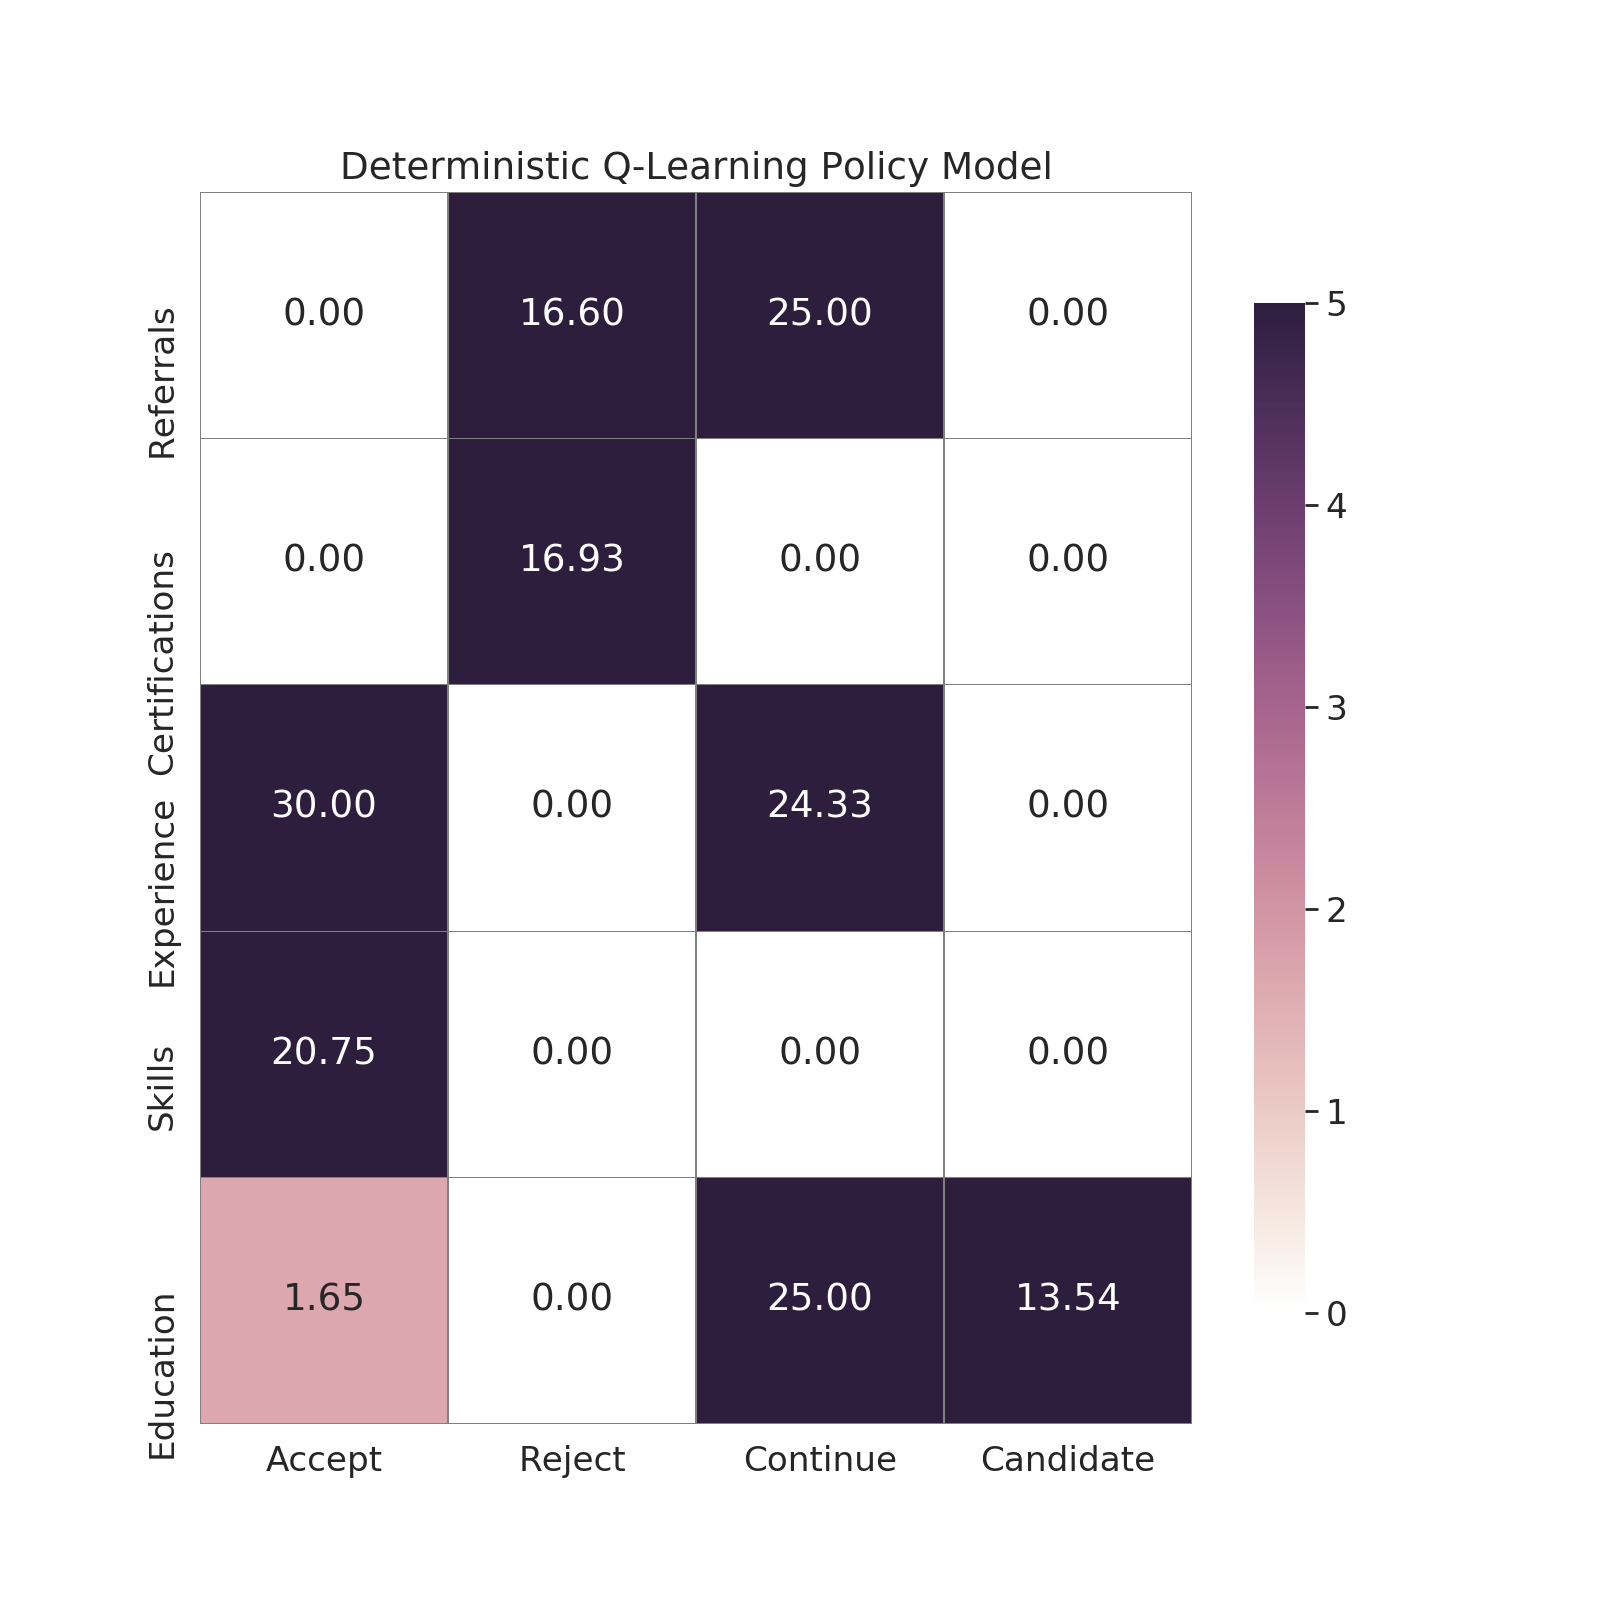

In [124]:
#Heat Map
data = q.tolist()

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Deterministic Q-Learning Policy Model')

plt.savefig('Deterministic_Q_Learning_Policy_Model.png')              
plt.show()

<IPython.core.display.Javascript object>


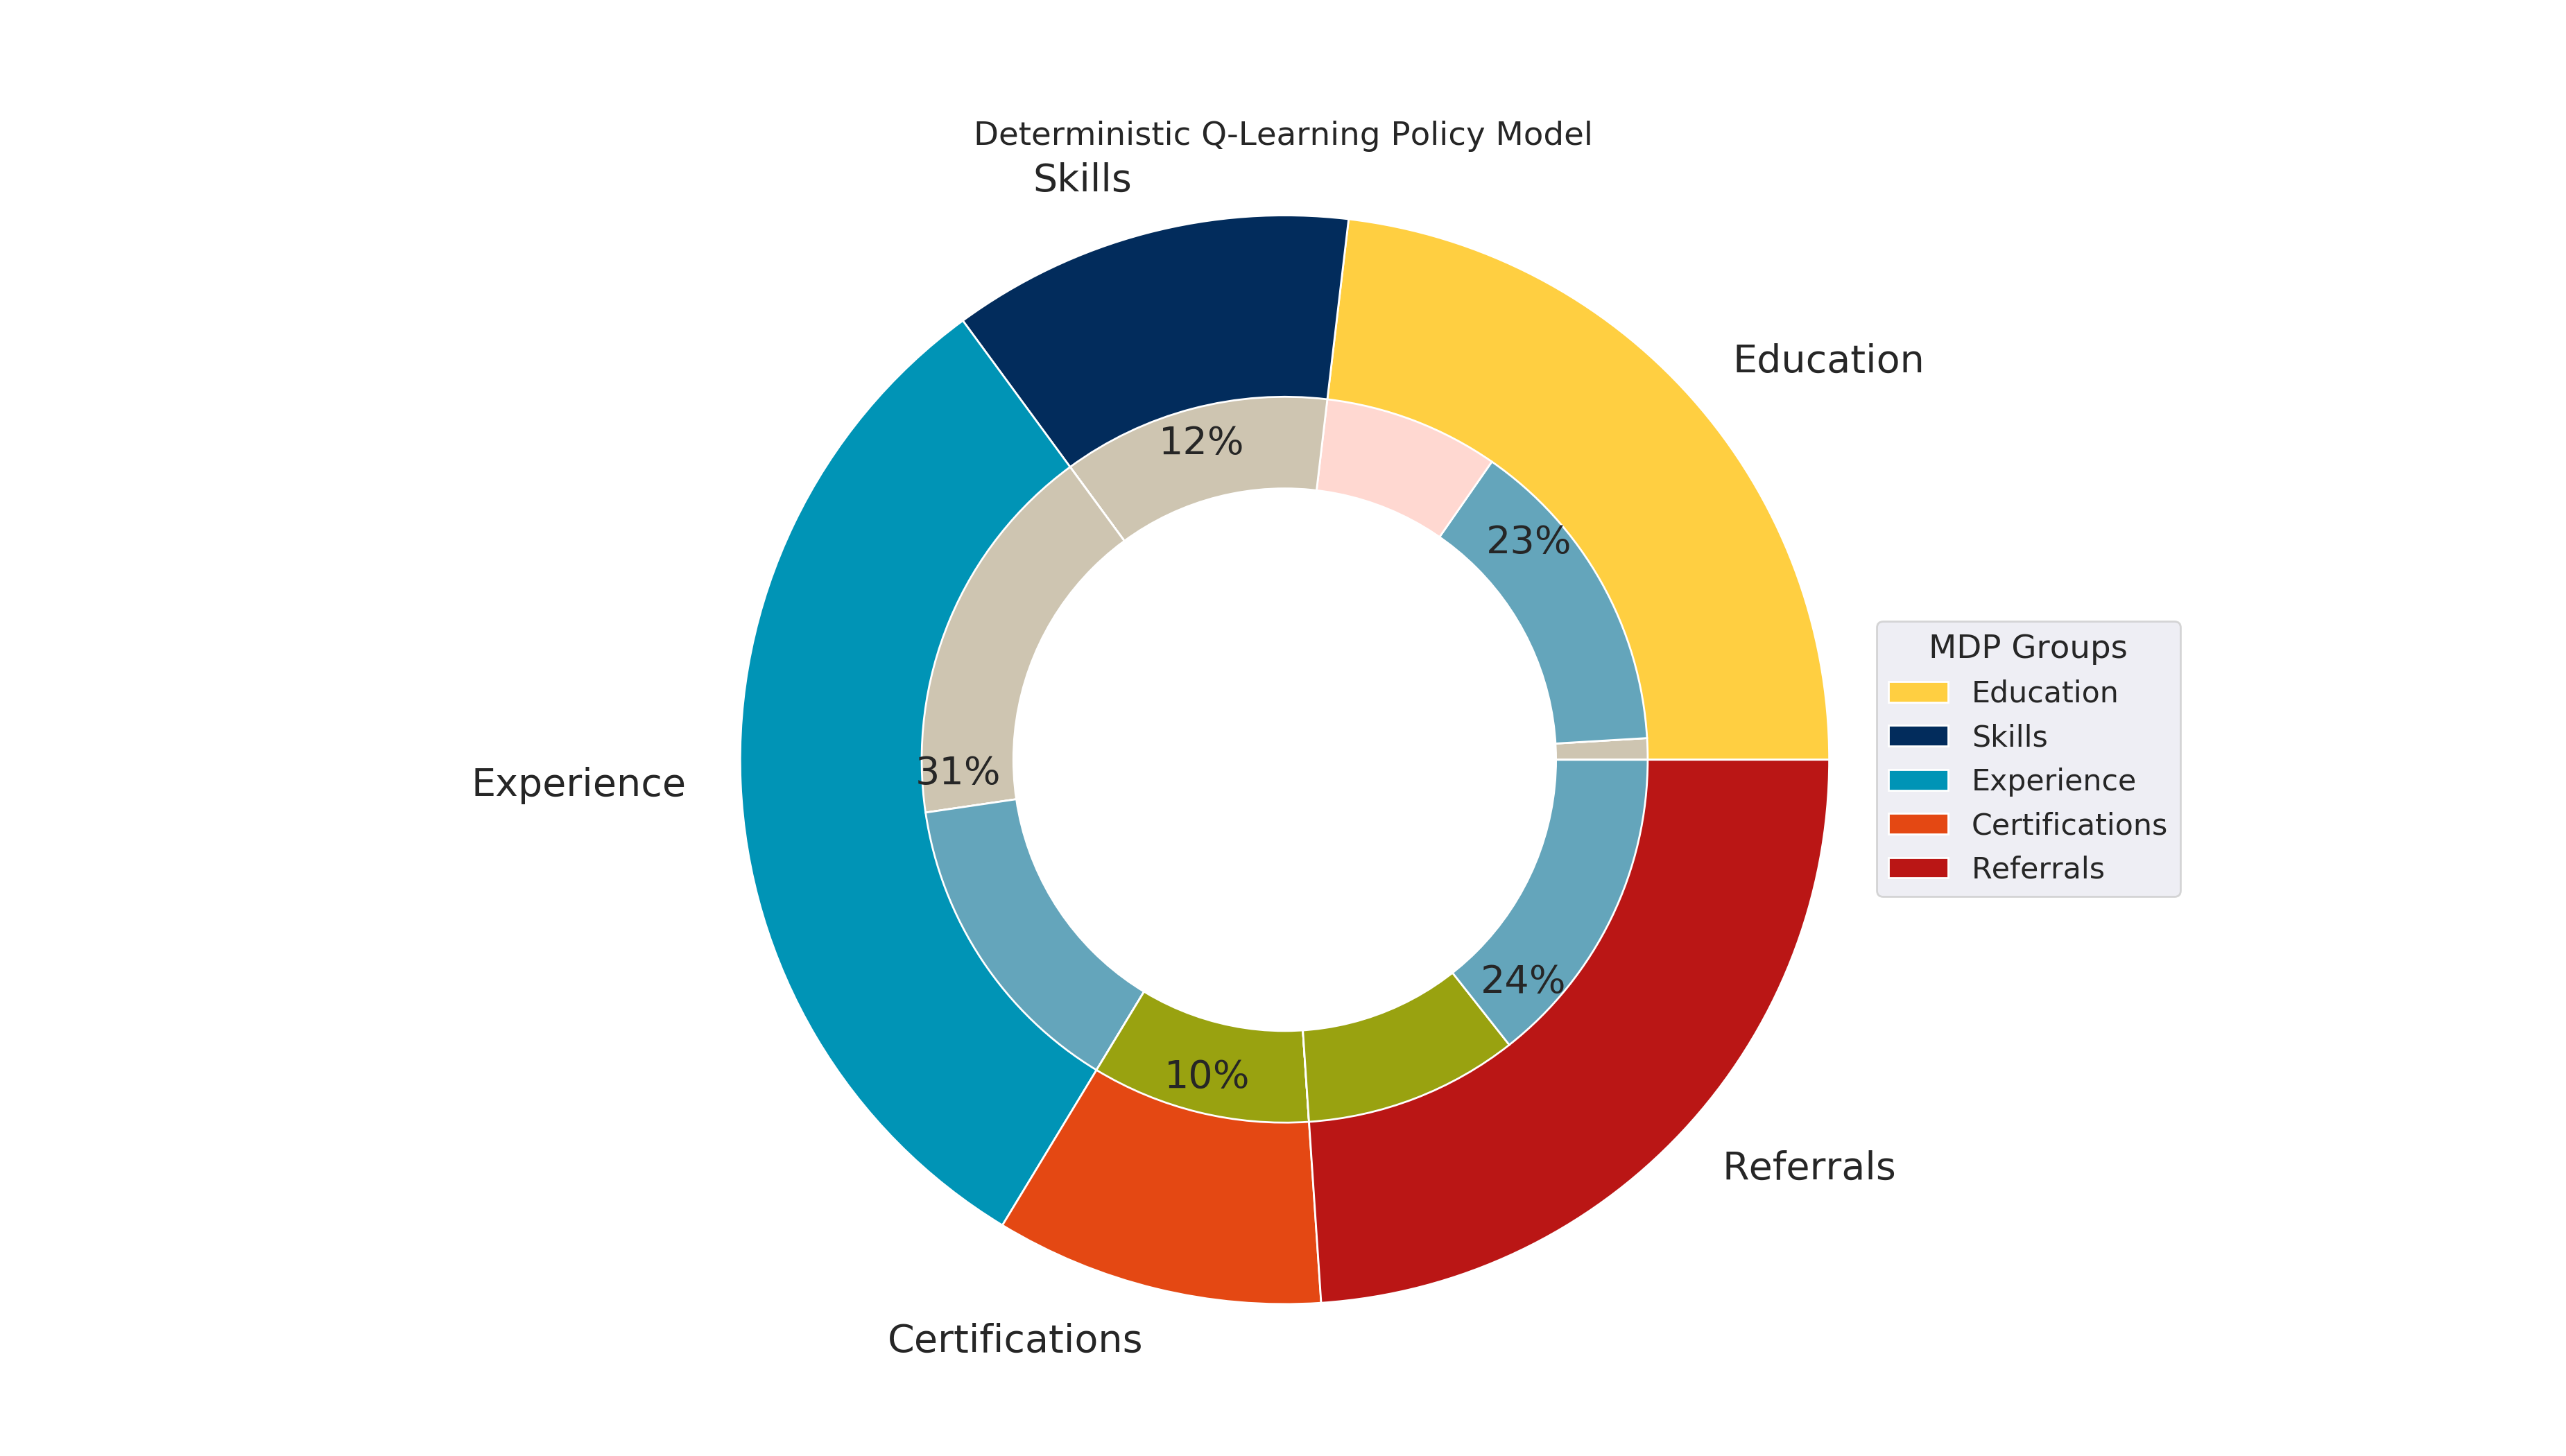

[[1.6495717763900757, 0.0, 24.999996185302734, 13.543996810913086], [20.749996185302734, 0.0, 0.0, 0.0], [29.999996185302734, 0.0, 24.32999610900879, 0.0], [0.0, 16.929996490478516, 0.0, 0.0], [0.0, 16.595149993896484, 24.999996185302734, 0.0]]


In [125]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(data)
print(data)

topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 




colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Deterministic Q-Learning Policy Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Deterministic_Q_Learning_Hiring_Modeling_Pie.png', )

plt.show()



#### Reward

                   Accept     Reject   Continue  Candidate
Education        1.649572   0.000000  24.999996  13.543997
Skills          20.749996   0.000000   0.000000   0.000000
Experience      29.999996   0.000000  24.329996   0.000000
Certifications   0.000000  16.929996   0.000000   0.000000
Referrals        0.000000  16.595150  24.999996   0.000000


<IPython.core.display.Javascript object>


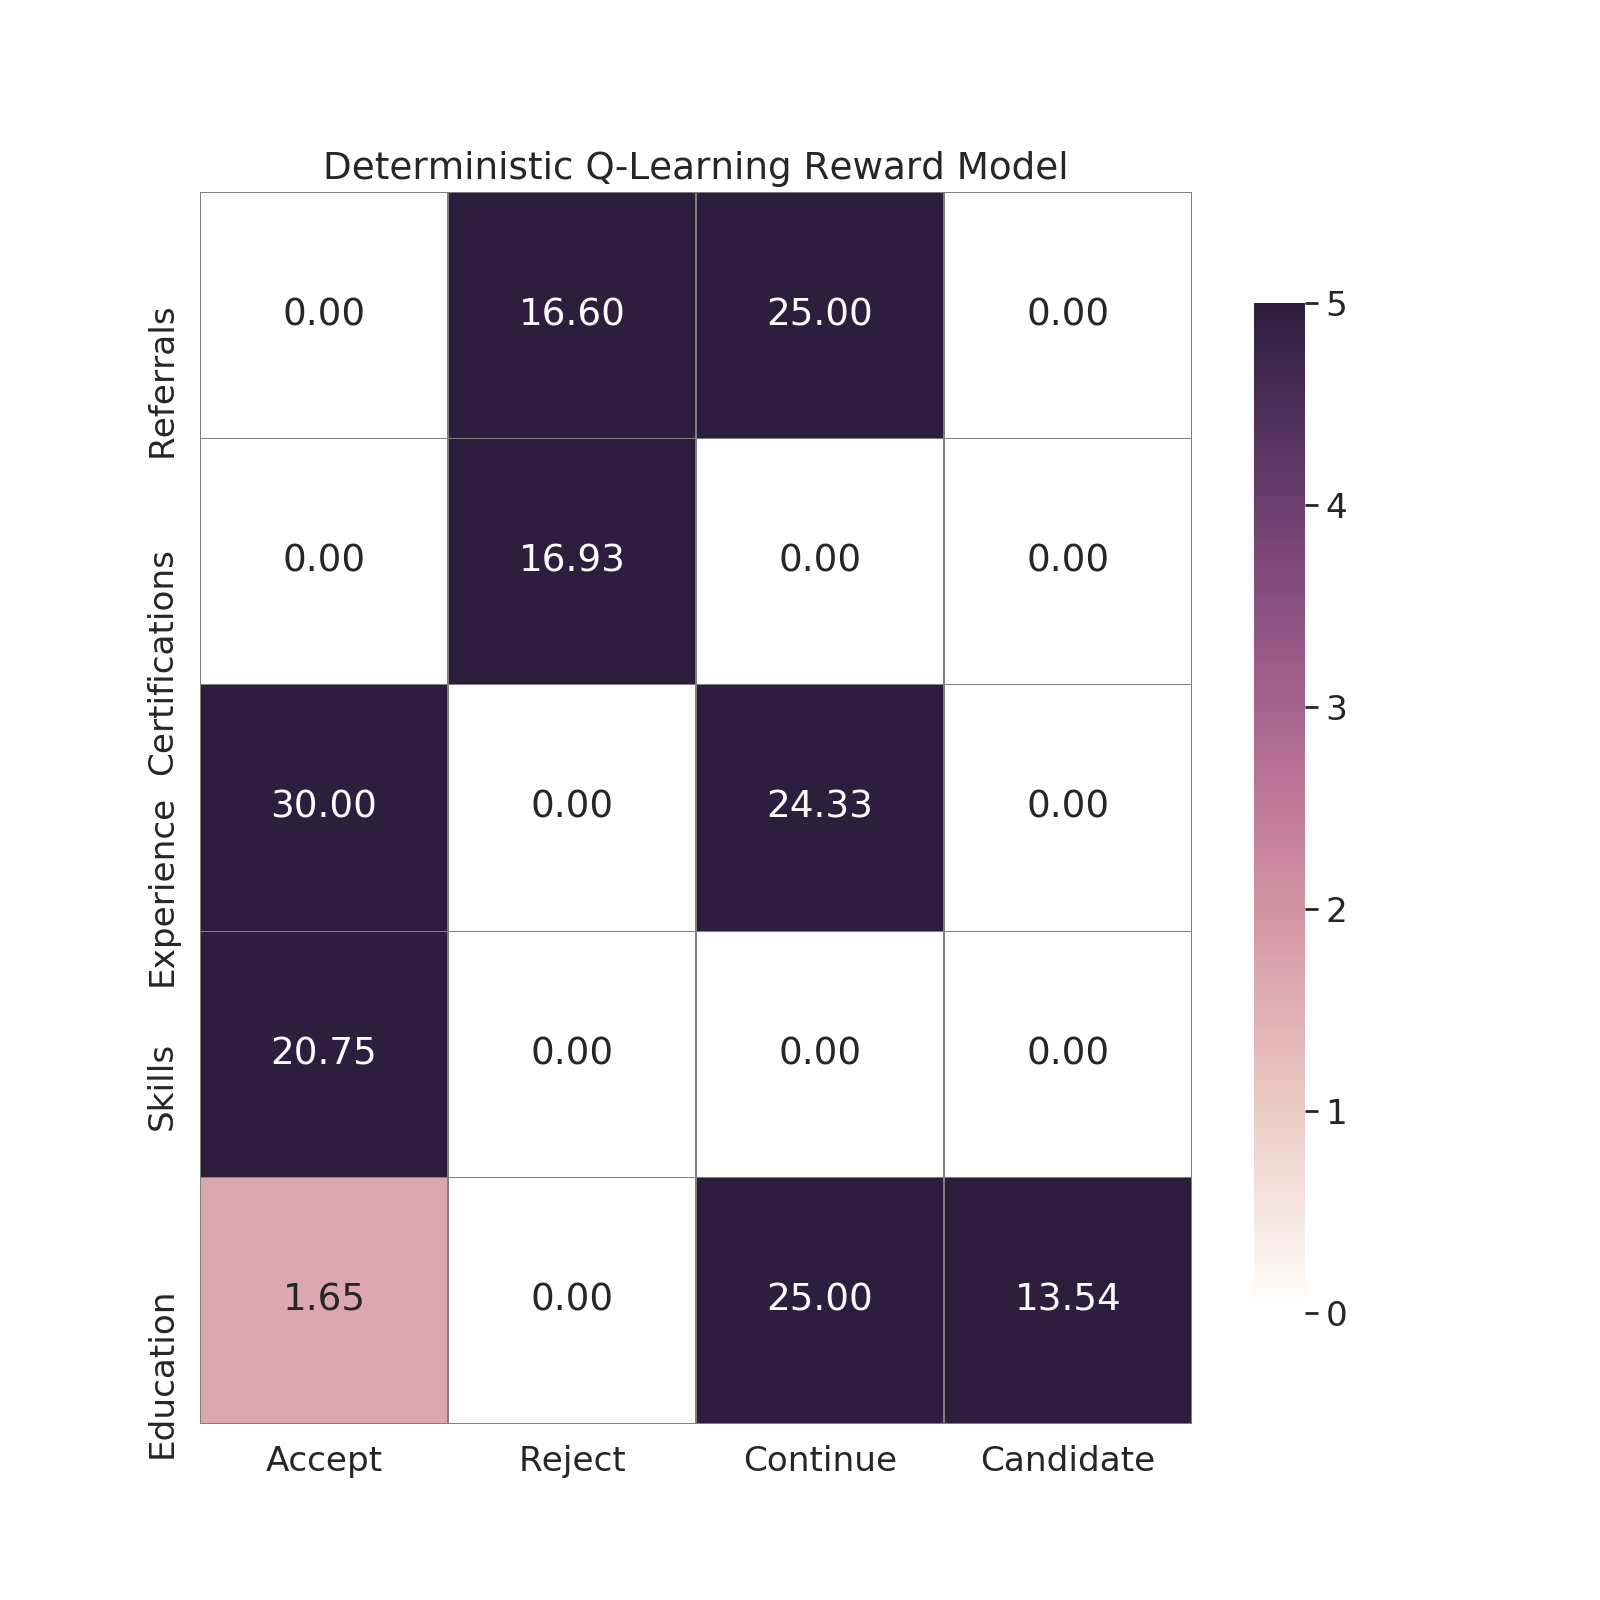

In [126]:
#Heat Map
data = q.tolist()

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Deterministic Q-Learning Reward Model')

plt.savefig('Deterministic_Q_Learning_Reward_Model.png')              
plt.show()

<IPython.core.display.Javascript object>


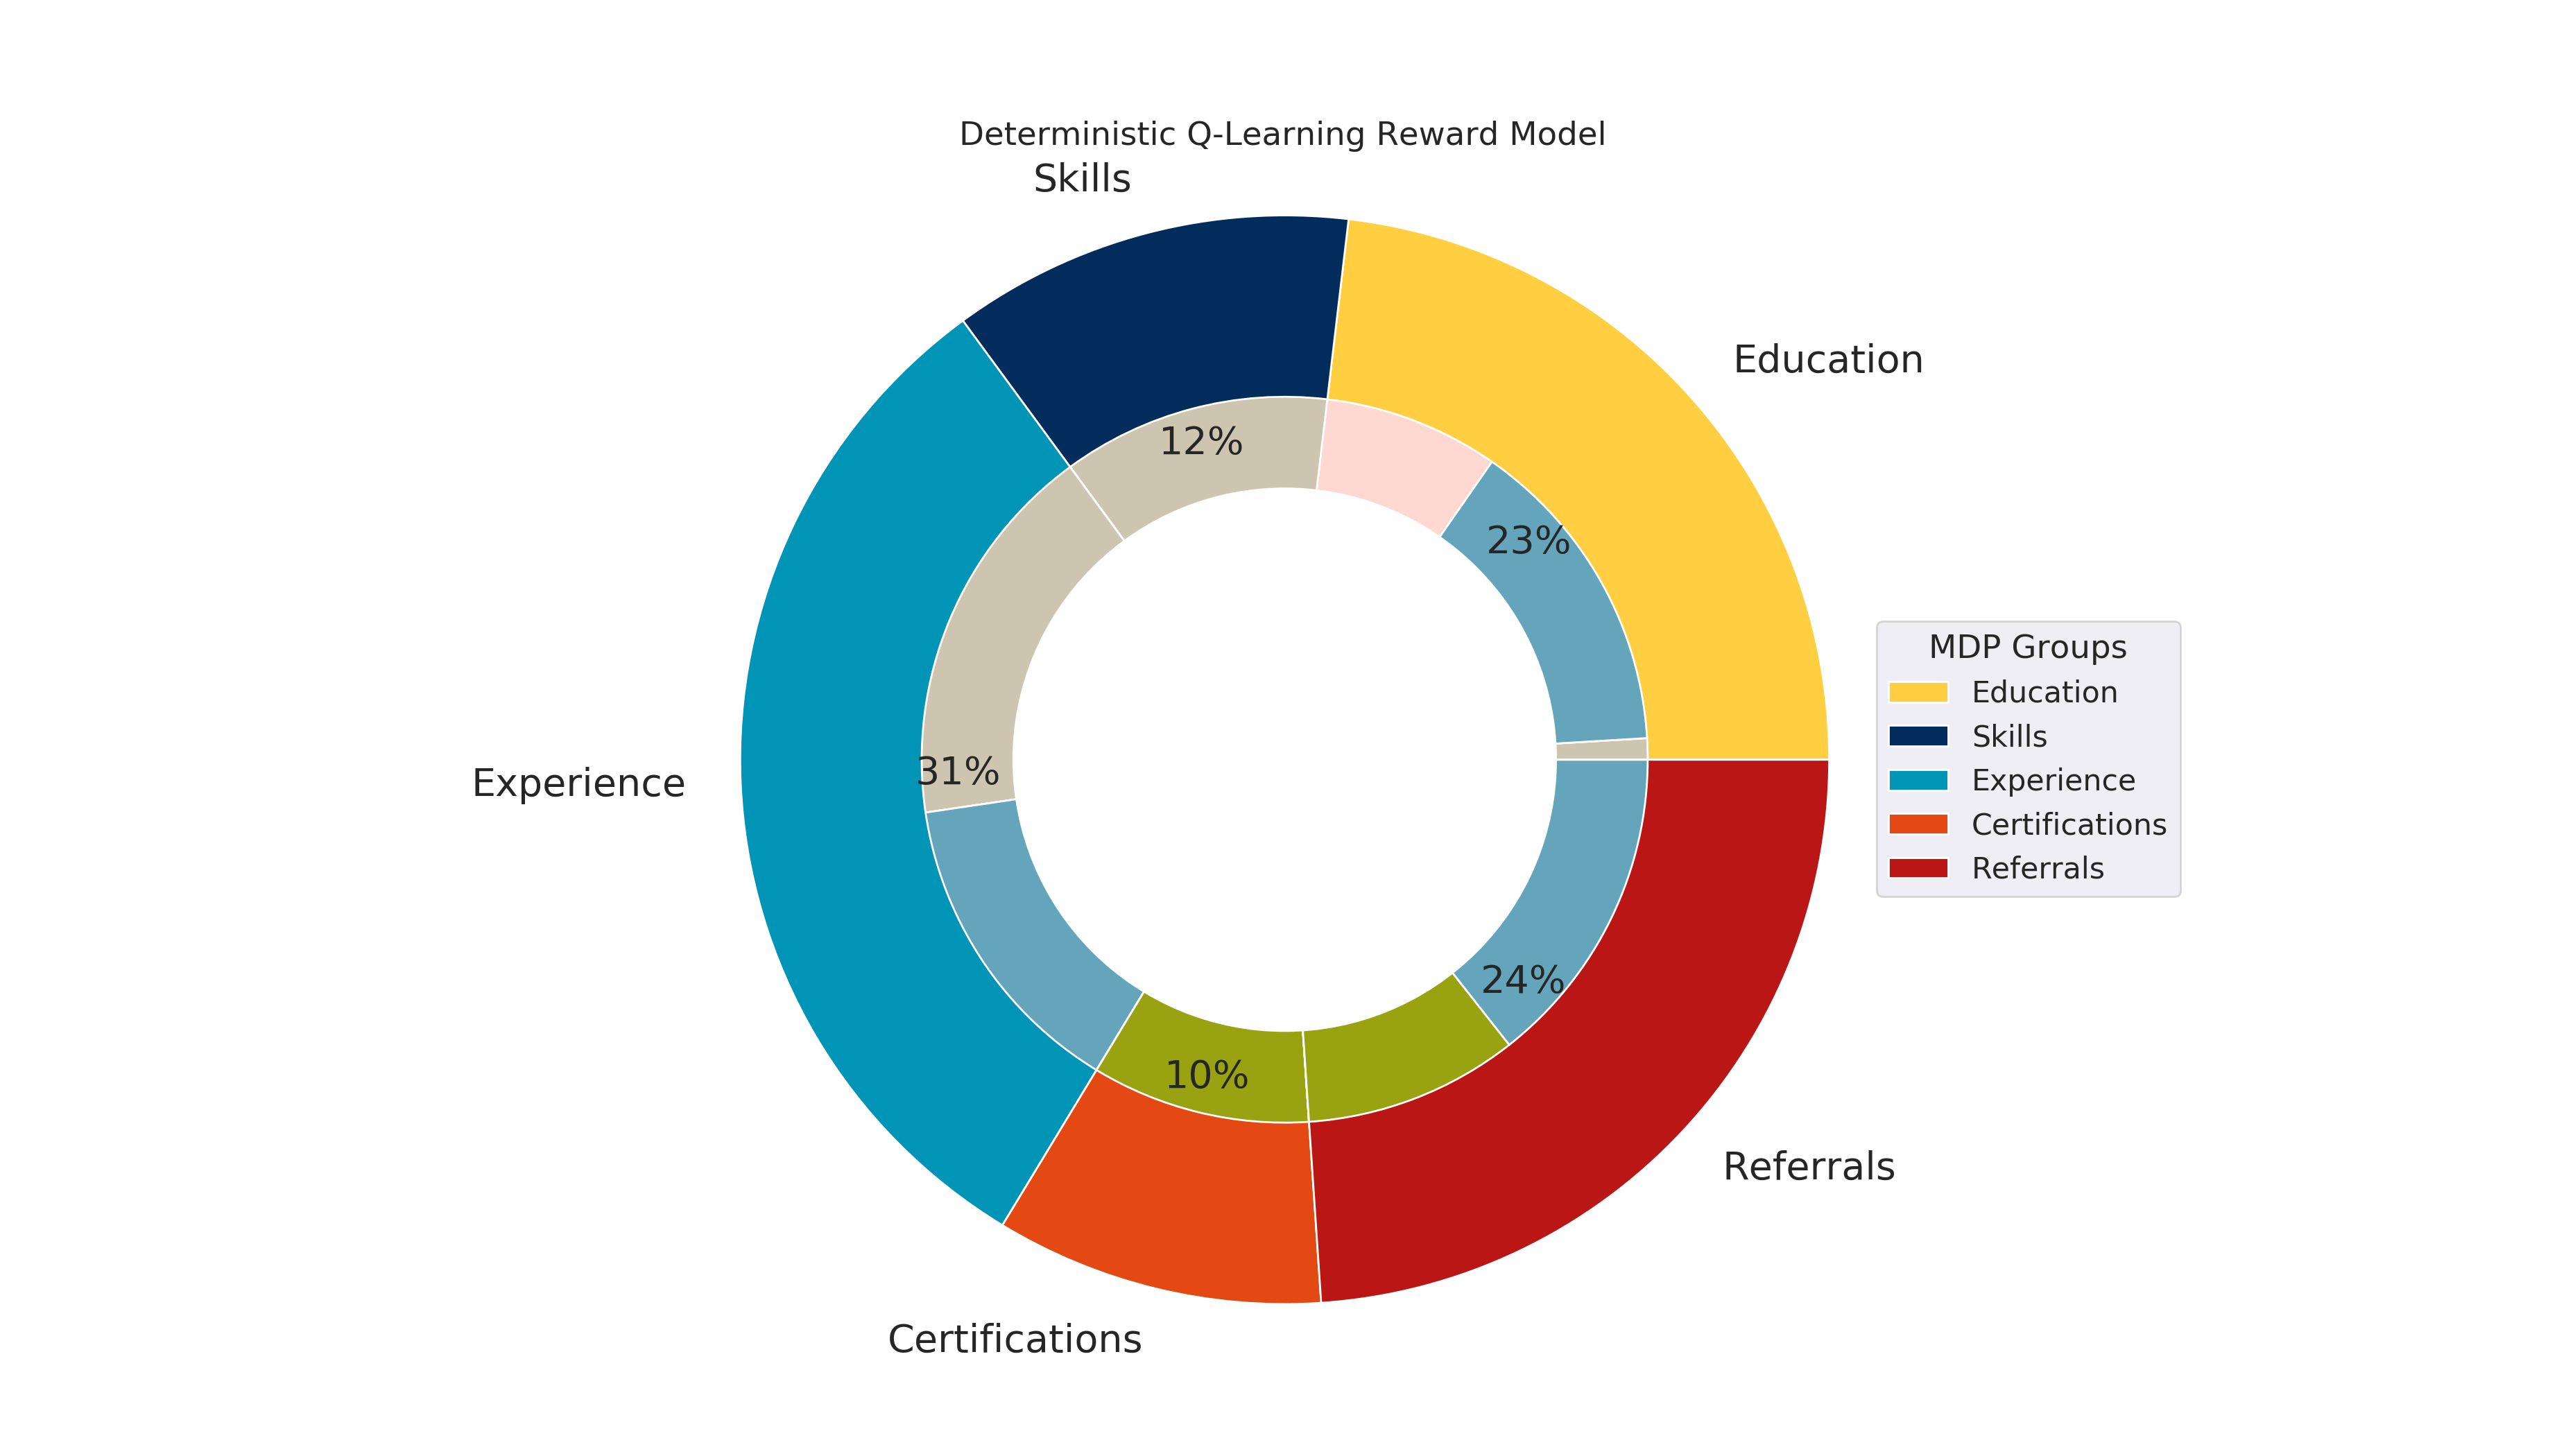

[[1.6495717763900757, 0.0, 24.999996185302734, 13.543996810913086], [20.749996185302734, 0.0, 0.0, 0.0], [29.999996185302734, 0.0, 24.32999610900879, 0.0], [0.0, 16.929996490478516, 0.0, 0.0], [0.0, 16.595149993896484, 24.999996185302734, 0.0]]


In [127]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(data)
print(data)

topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Deterministic Q-Learning Reward Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Deterministic_Q_Learning_Reward_Pie.png')

plt.show()

## Random  MDP Implementation w/iterations 

Stochastic

In [128]:

rows = 5
cols = 4
grid2 = [[0 for i in range(cols)] for i in range(rows)] #5States x 4 Actions
reward_grid2 = [[0 for i in range(cols)] for i in range(rows)] #5States x 4 Actions

#Keeping track of how reward is calculated
Lev = Levenshtein

#For the reward, I have chosen a gradually increasing reward as the goal is approached with obstacles based on the Lev score
reward = []

n_episodes = 30

print("Decision Modeling MDP Choice Game")
print("===========================================")
print("Follow the prompted Instructions")
    
def mdp_game():
    r = 0
    
    pi = []
    input_state = rm.randint(0,5) #before for loop
    
    prob = rm.uniform(0, 1)
    print(prob)
            
            
    if (prob < .8): #80% chance of action occuring
        state = input_state 
        print("In STATE", state)
    else:
        if(prob < .2):
            
            state = rm.randint(3,5) 
            print("In STATE", state)
        else:
            state = rm.randint(1,5)
            print("In STATE", state)
            
    if( state == 1 ):
        print("You have selected Education")
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
        
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[0][0] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[0][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[0][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
             
            reward_grid2[0][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid2[0][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[0][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[0][3] += 1
            #             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[0][3] += r
            
        else:
            print("Invalid Action Chosen!")
      
    elif( state == 2 ):
        print( "You have selected Skills" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c', 'd']
        b=rm.randint(0,3)
        action = list1[b]

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[1][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[1][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[1][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[1][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid2[1][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
             
            reward_grid2[1][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[1][3] += 1
            
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[1][3] += r
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 3 ):
        print( "You have selected Experience" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
            
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[2][0] += 1
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[2][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[2][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[2][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid2[2][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
           
            reward_grid2[2][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[2][3] += 1
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[2][3] += r 
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 4 ):
        print( "You have selected Certifications" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
        
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[3][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[3][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid2[3][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[3][3] += 1
            
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice)  
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][3] += r
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 5 ):
        print( "You have selected Referral" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
        
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[4][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[4][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[4][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
             
            reward_grid2[4][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid2[4][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[4][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            
            grid2[4][3] += 1
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[4][3] += r
            
        else:
            print("Invalid Action Chosen!")

    else:
        print("Invalid choice!")        
    print("Reward: ", reward)
    

    
def candidates(choice):

    if choice == 1:
        print("You have chosen Candidate 1:")
        mdp_game()
    elif choice == 2:
        print("You have chosen Candidate 2:")
        mdp_game()
    elif choice == 3:
        print("You have chosen Candidate 3:")
        mdp_game()
    

def check(grid2, val):
    return(all(x > val for x in grid2[:][0]))


for e in range(int(n_episodes)): 
    print("---------------------------Episode---------------------------", e)
    while True:
            print("STARTING GAME")
            choice = rm.randint(0,1)
    #         choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice)

            #Automate Restart of game
            list1=['N', 'Y']
            b=rm.randint(0,1)
            restart = list1[b]
            print("I HAVE ACCESS", grid2[:][0])
            acct = [i[0] for i in grid2]
            print(acct)

            if restart == 'N':
                print("GAME OVER")
                break
            elif restart == 'Y':
                print("NEW GAME")
    
            
print("StatesxActions Grid2: ", grid2)
print("StatesxActions Reward Grid2: ", reward_grid2)
print("reward:", sum(reward))
print("reward Summed Array:", (reward))


Decision Modeling MDP Choice Game
Follow the prompted Instructions
---------------------------Episode--------------------------- 0
STARTING GAME
You have chosen Candidate 1:
0.457288763353926
In STATE 1
You have selected Education

Which action would you like to take?
 A) Examine Another Section
 B) Accept the Candidate's Application
 C) Decline the Candidate's Application 

Enter A or B or C:
 
You have chosen to continue viewing the candidate's application
Continue
0.9189025002831515
In STATE 3
You have selected Experience

Which action would you like to take?
 A) Examine Another Section
 B) Accept the Candidate's Application
 C) Decline the Candidate's Application 

Enter A or B or C:
 
You have chosen to continue viewing the candidate's application
Continue
0.6923635523295787
In STATE 1
You have selected Education

Which action would you like to take?
 A) Examine Another Section
 B) Accept the Candidate's Application
 C) Decline the Candidate's Application 

Enter A or B or C:
 
Yo

In [129]:
print(grid2)

[[2, 3, 5, 4], [1, 1, 2, 3], [3, 2, 6, 3], [2, 4, 4, 1], [4, 2, 4, 2]]


                Accept  Reject  Continue  Candidate
Education            2       3         5          4
Skills               1       1         2          3
Experience           3       2         6          3
Certifications       2       4         4          1
Referrals            4       2         4          2


<IPython.core.display.Javascript object>


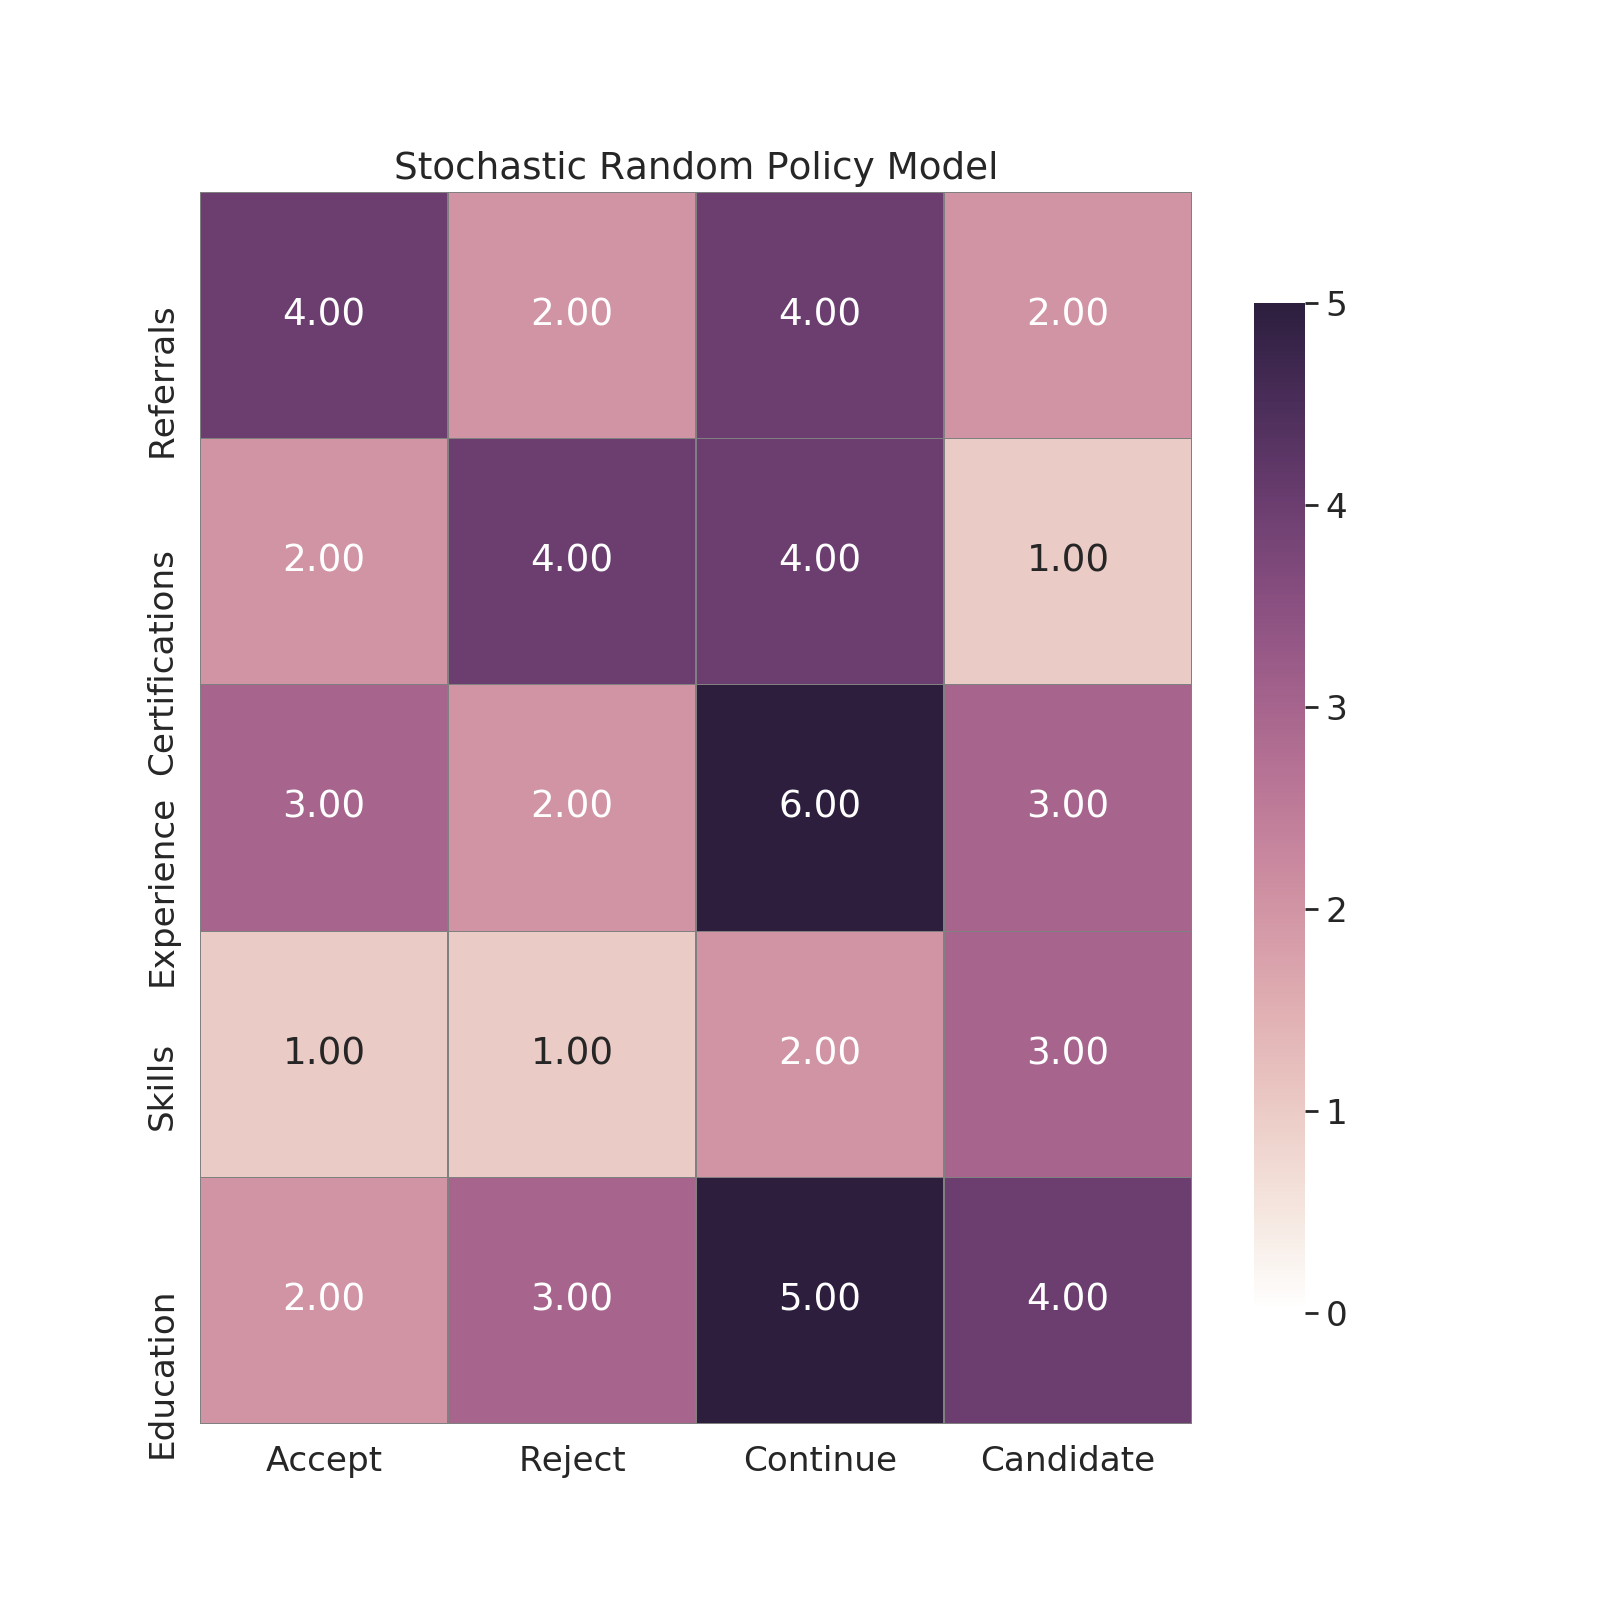

In [130]:
#Heat Map
data = grid2

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Stochastic Random Policy Model')

plt.savefig('Stochastic_Random_Policy_Model.png')

plt.show()

<IPython.core.display.Javascript object>


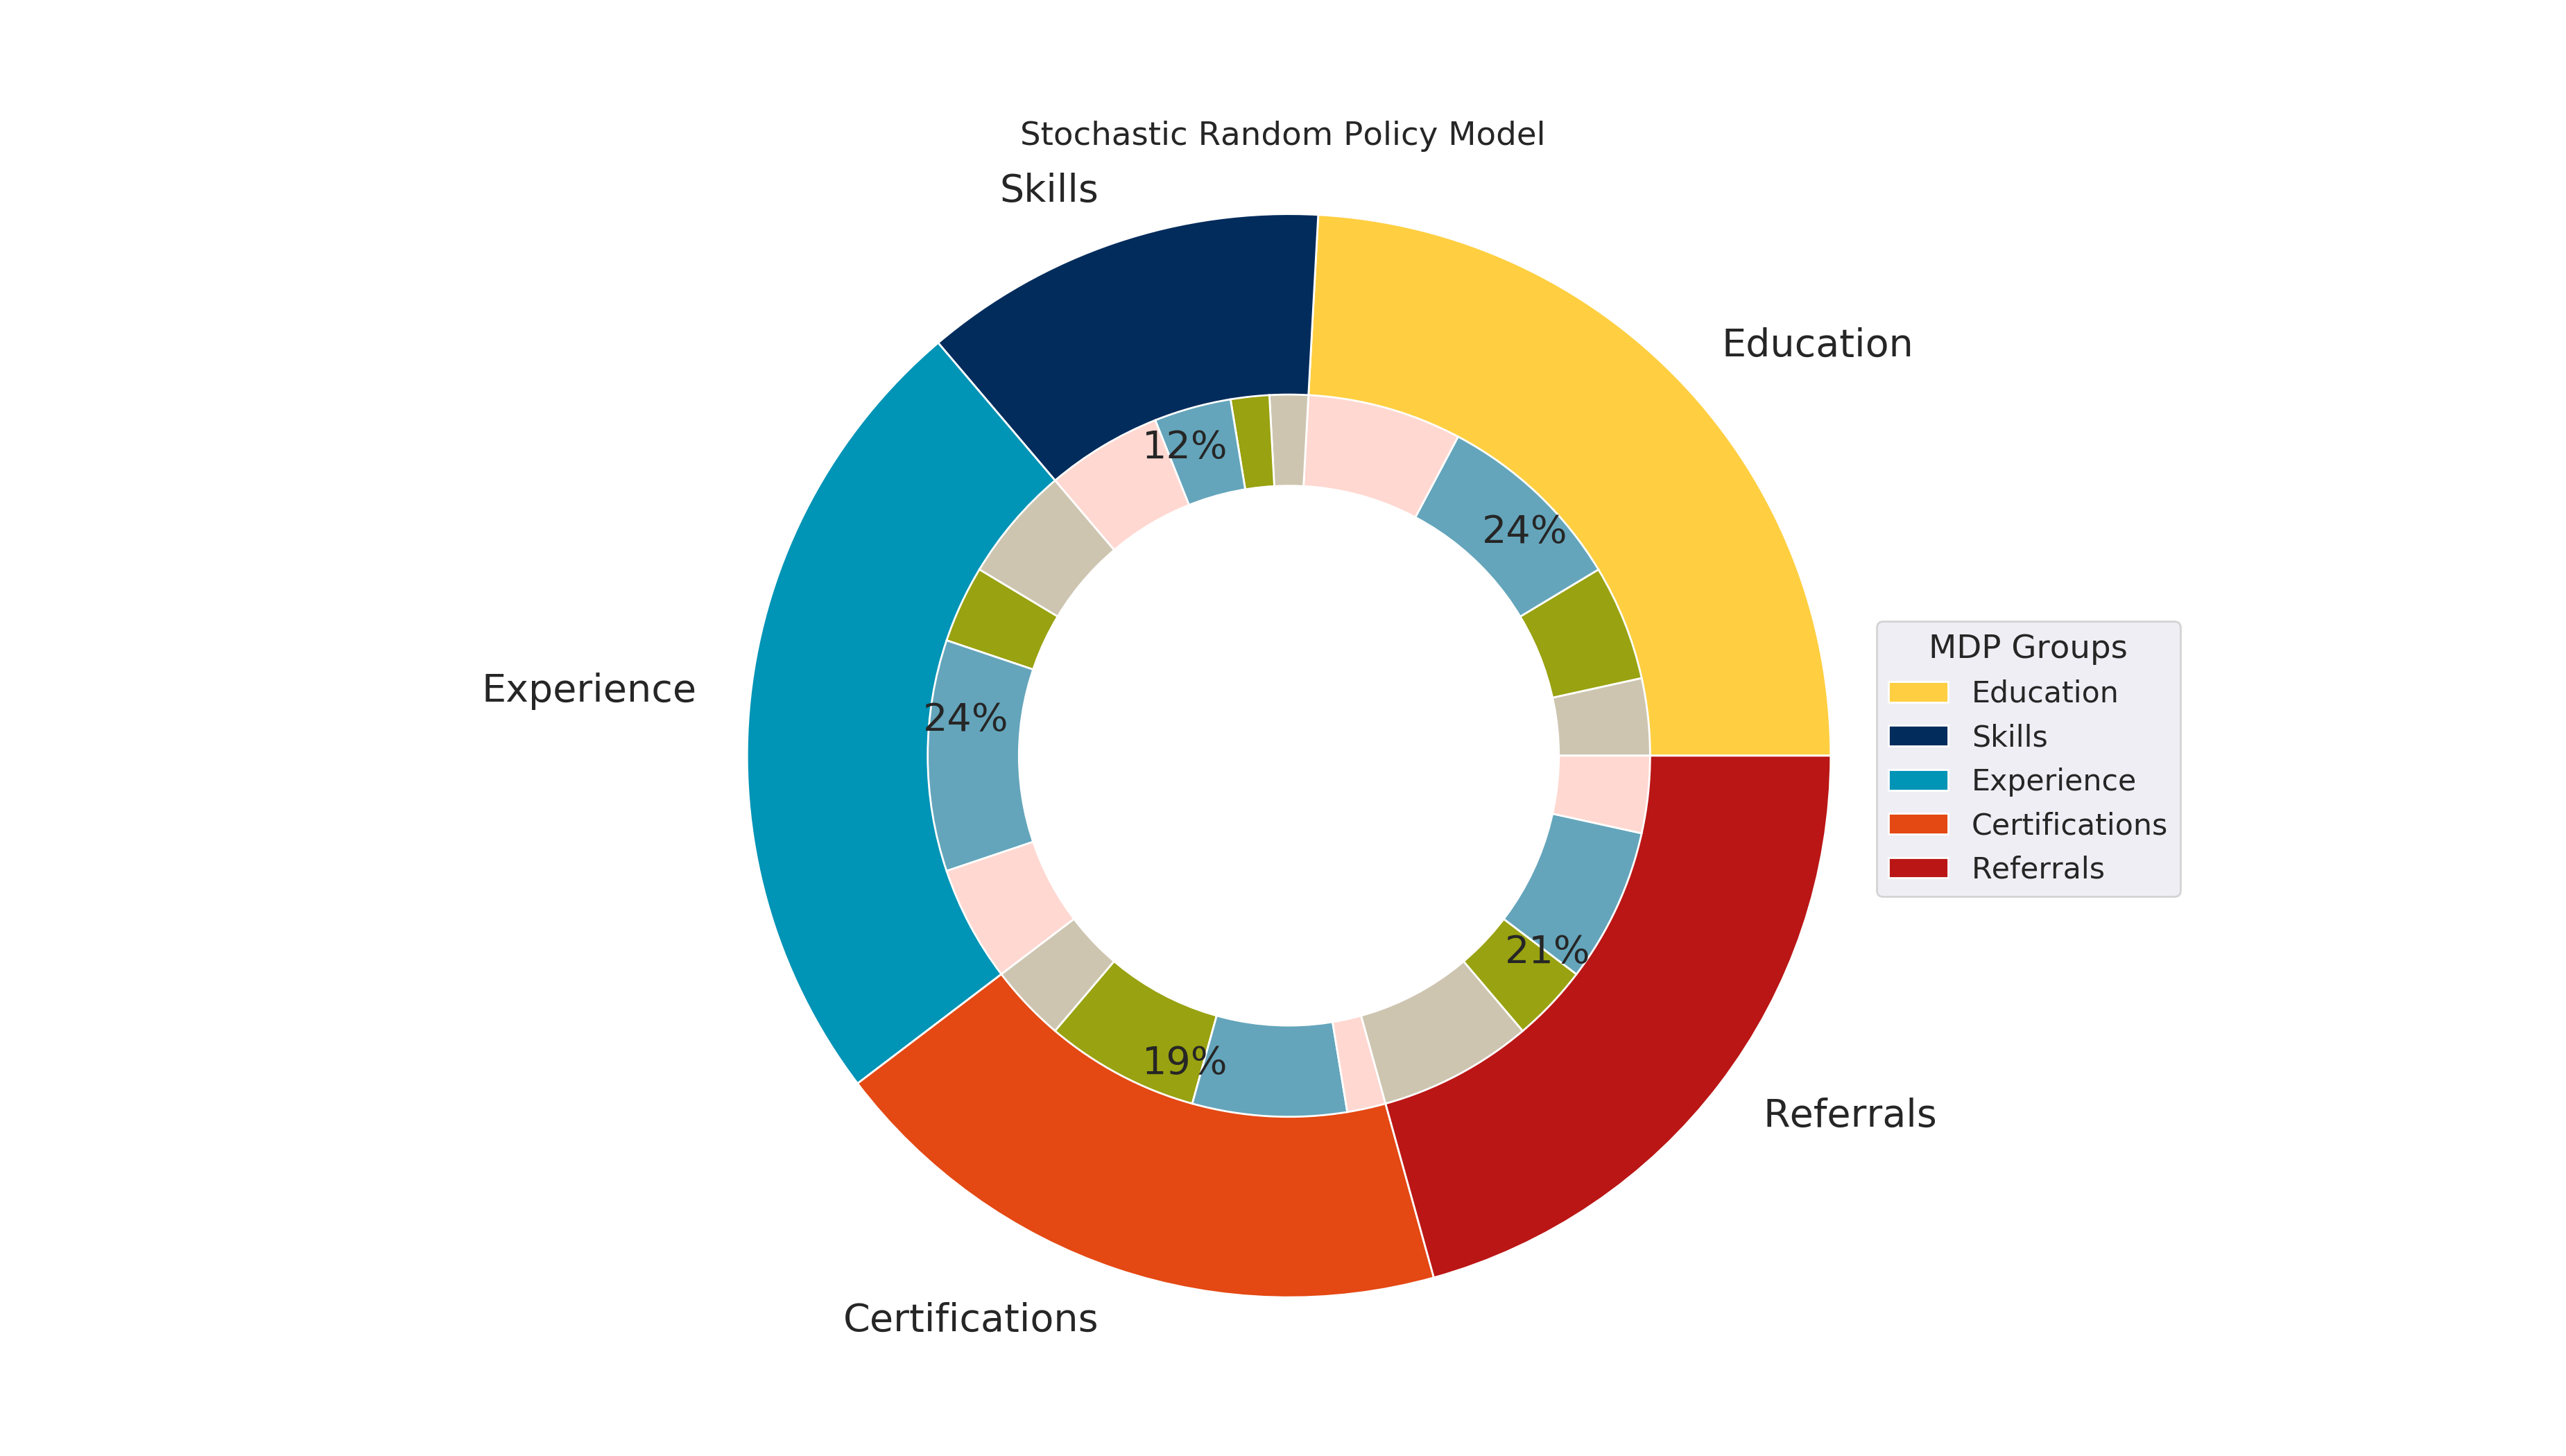

In [131]:
#Donut Chart
#Donut Chart
##### Donut Chart
fig, ax = plt.subplots()

size = 1.75
vals = np.array(grid2)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Stochastic Random Policy Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Stochastic_Random_Policy_Model_Pie.png')

plt.show()

##### Reward

                Accept  Reject  Continue  Candidate
Education            2       3         5          4
Skills               1       1         2          3
Experience           3       2         6          3
Certifications       2       4         4          1
Referrals            4       2         4          2


<IPython.core.display.Javascript object>


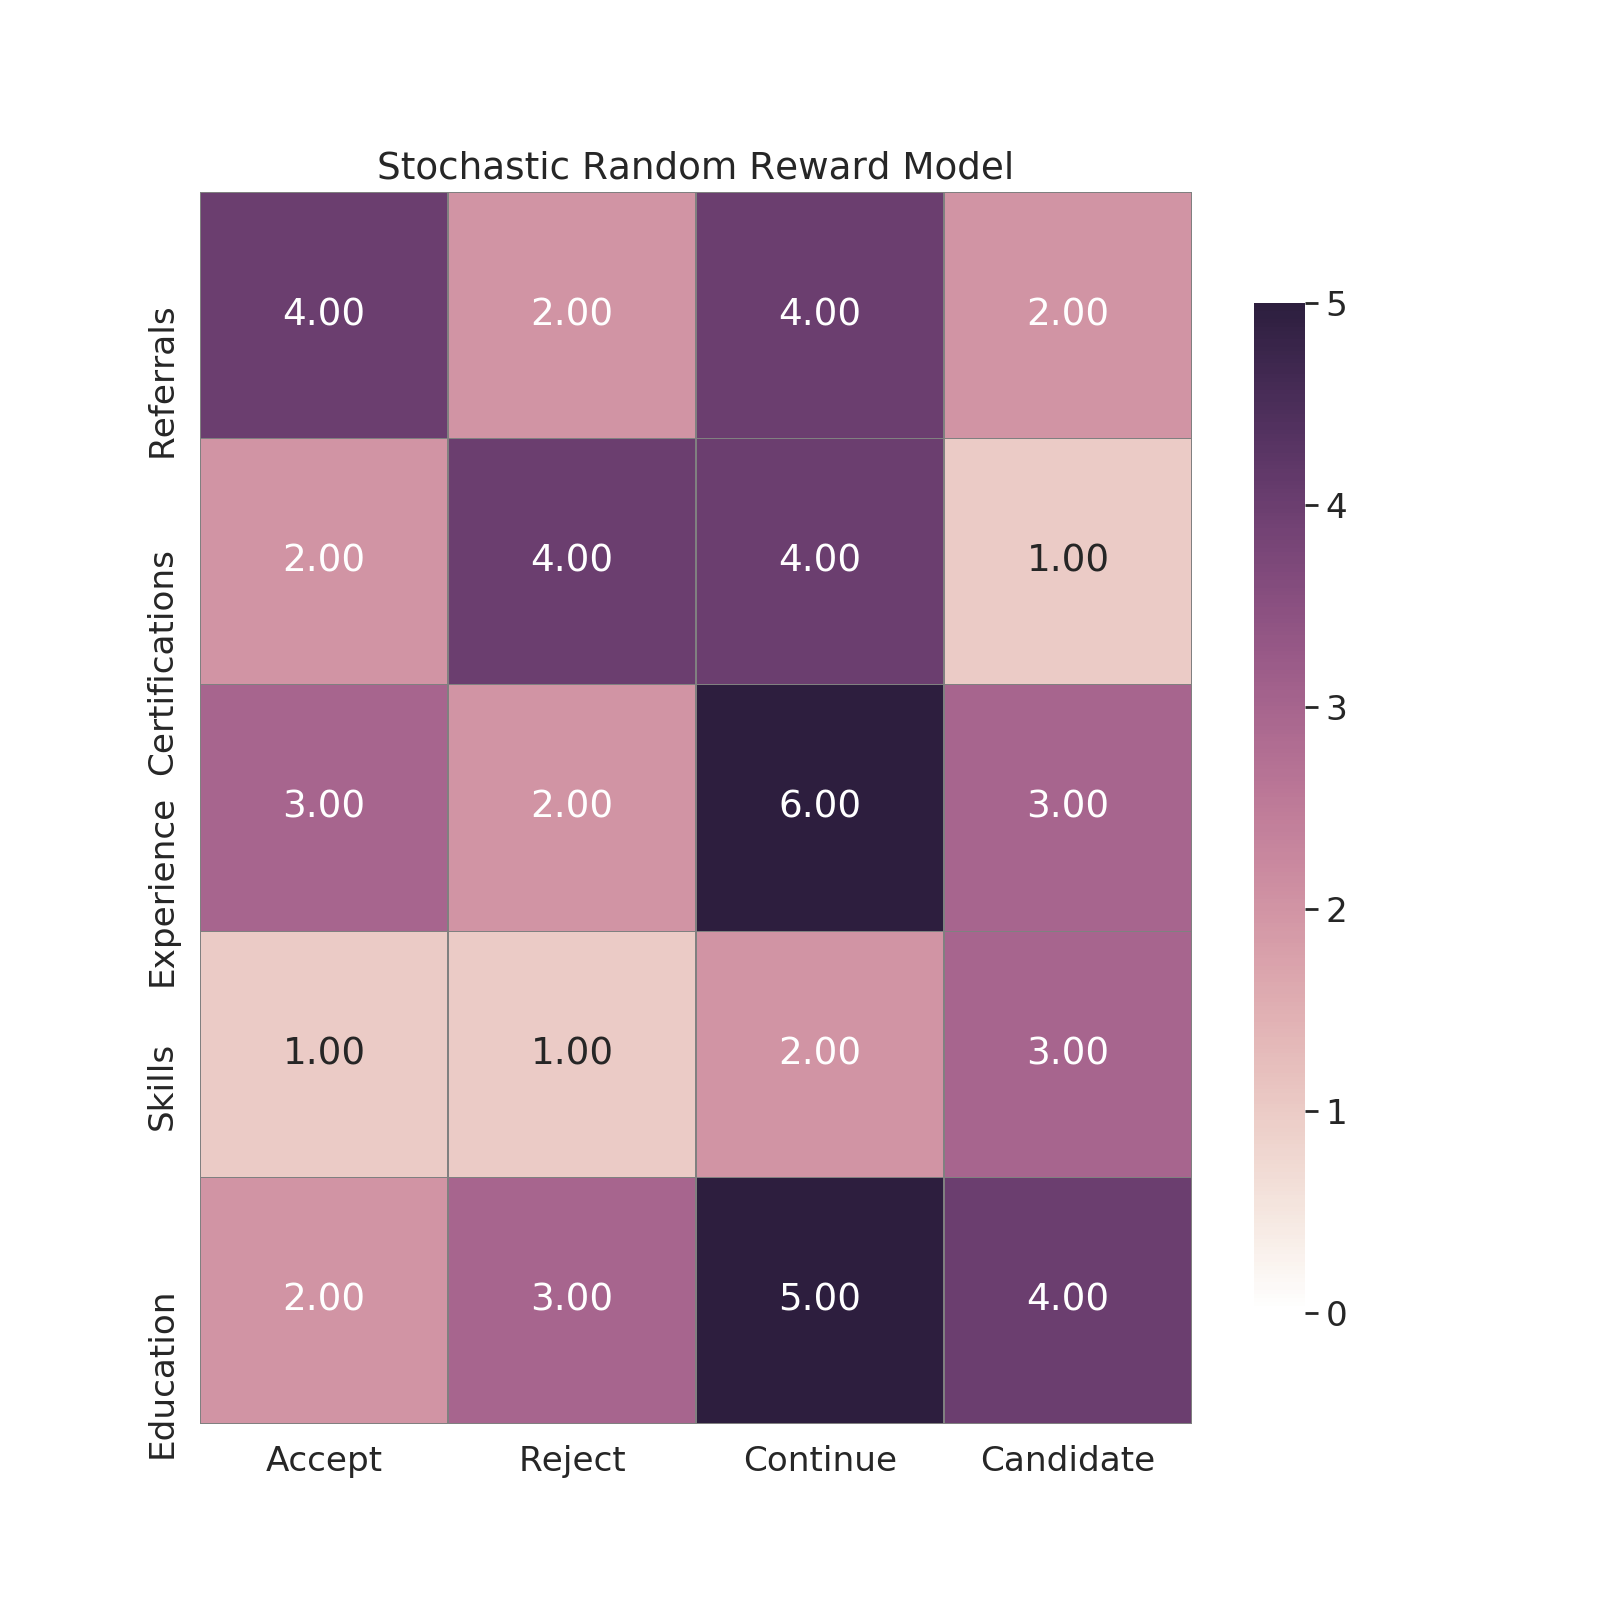

In [132]:
#Heat Map
data = grid2

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Stochastic Random Reward Model')

plt.savefig('Stochastic_Random_Reward_Model.png')
plt.show()

<IPython.core.display.Javascript object>


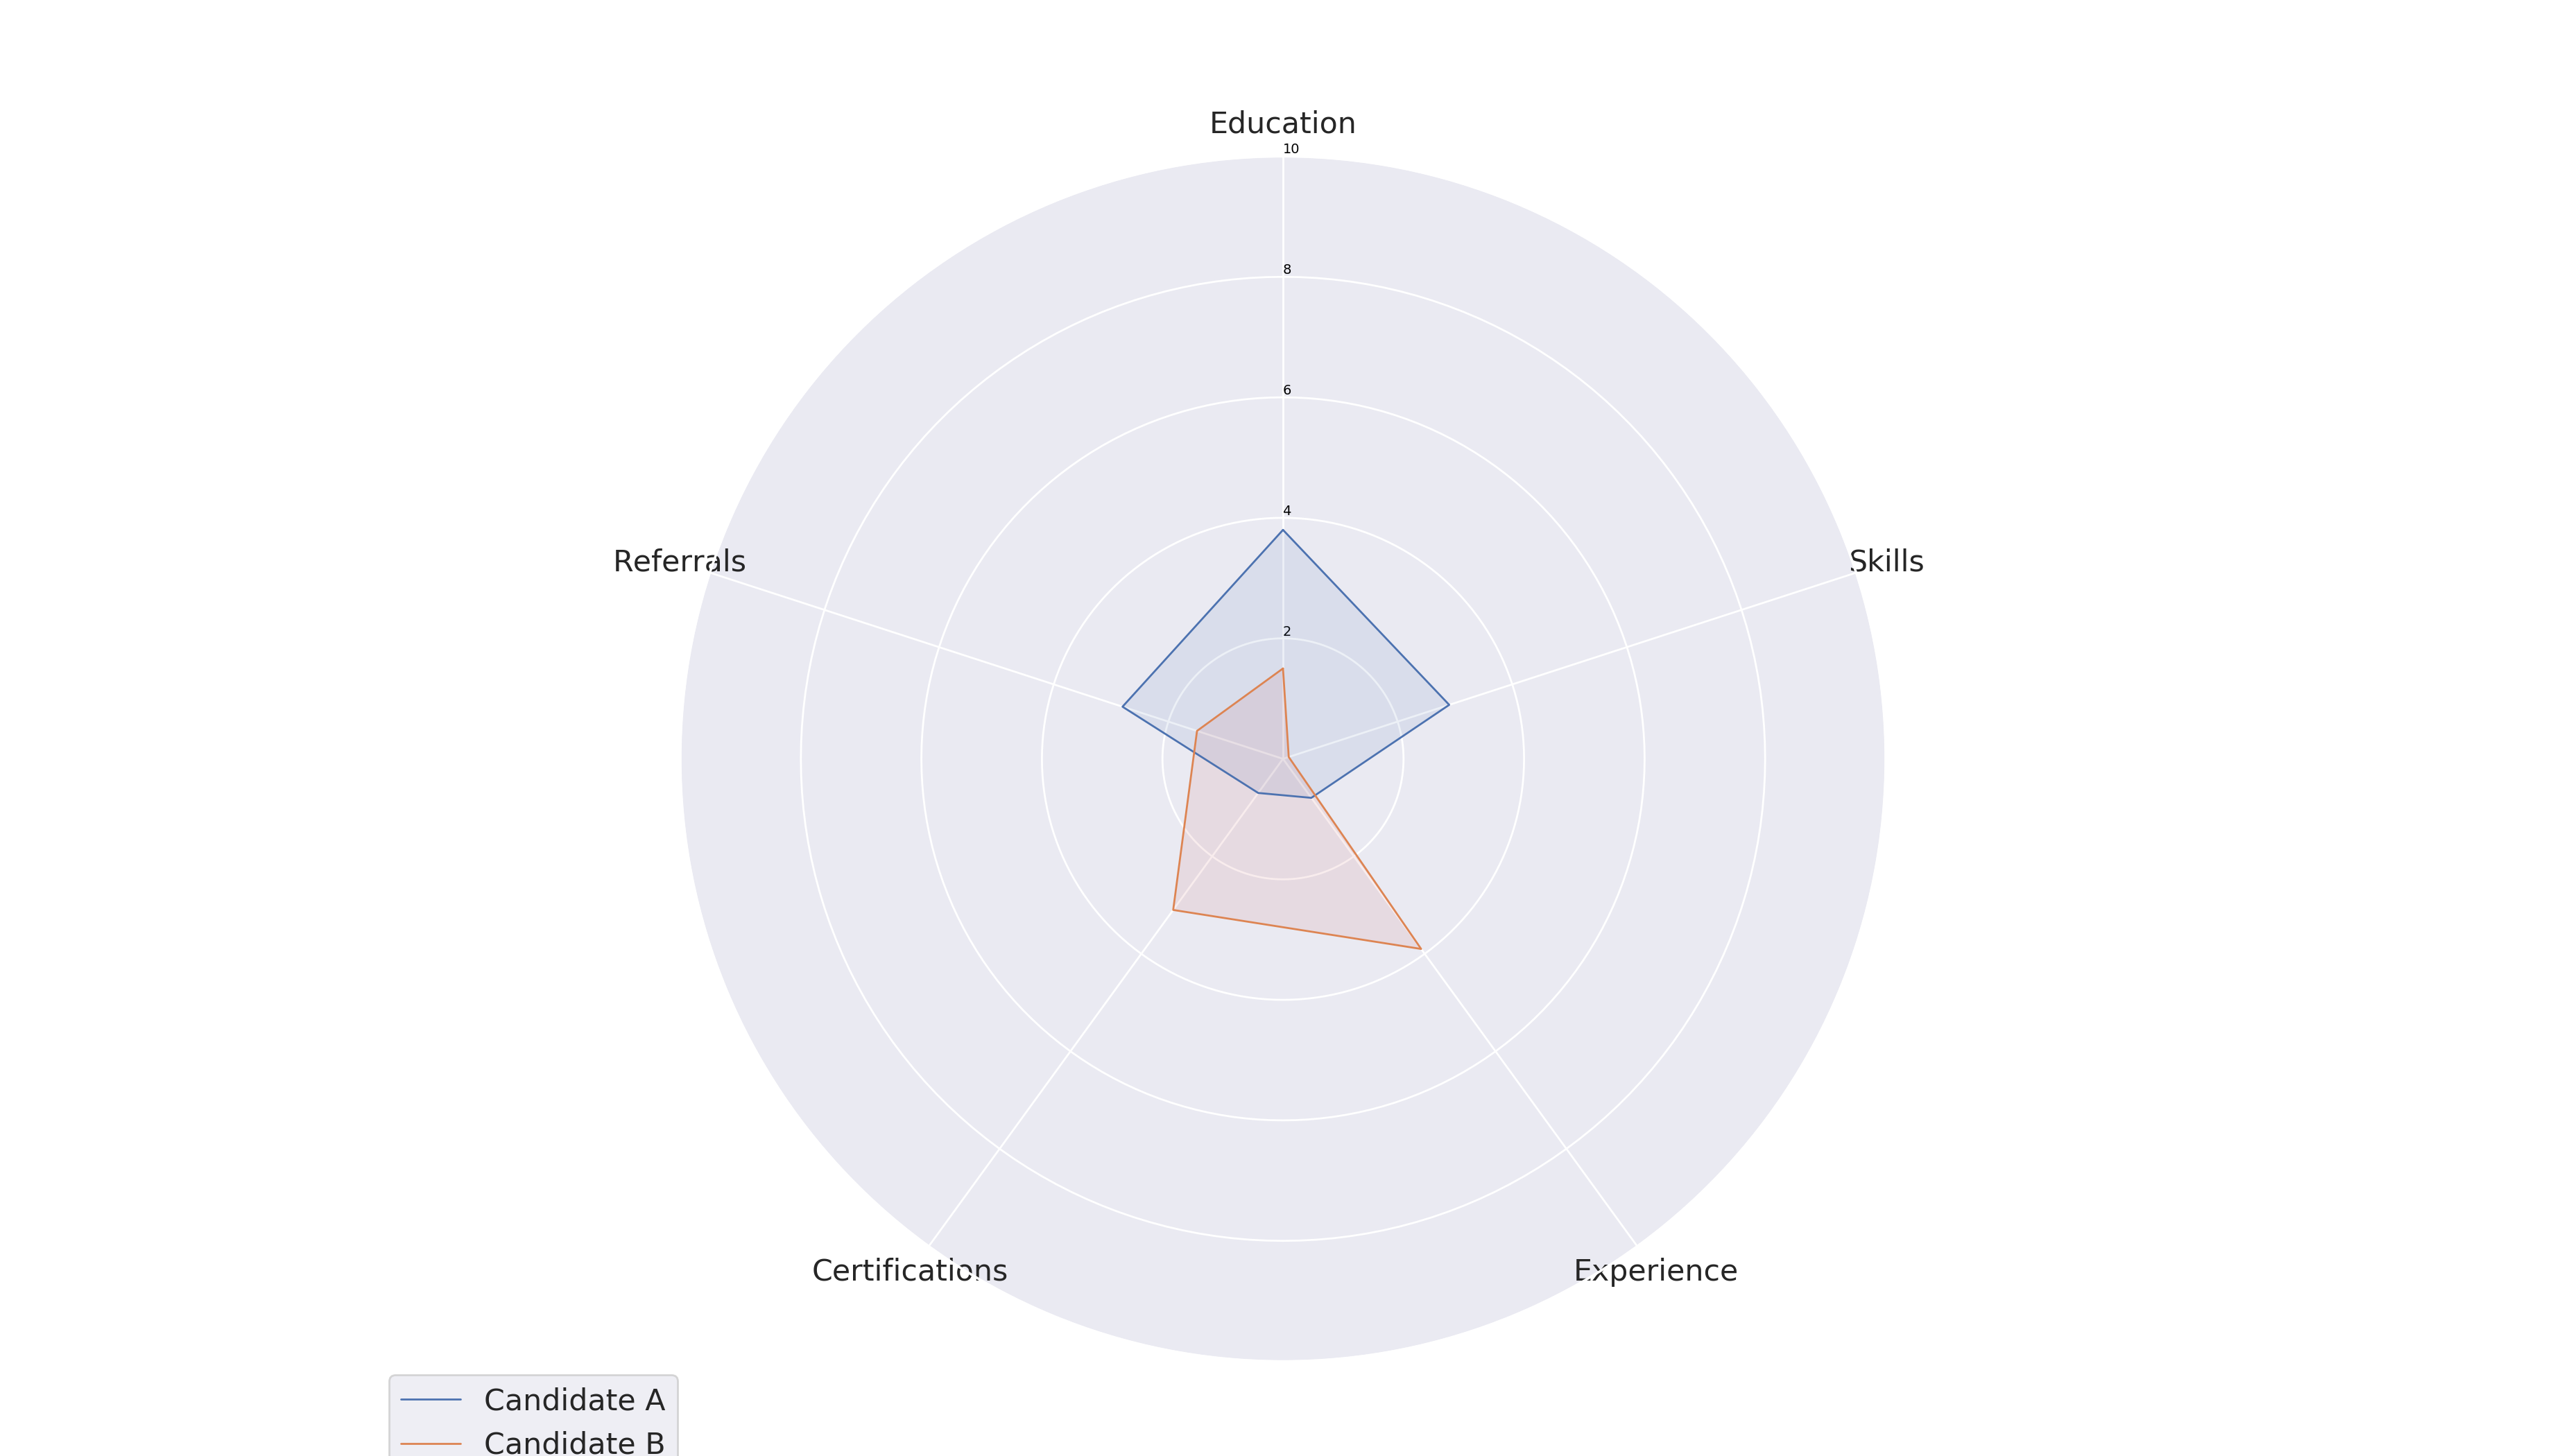

In [133]:
#Donut Chart


fig, ax = plt.subplots()

size = 1.75
vals = np.array(grid2)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Stochastic Random Reward Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Stochastic_Random_Reward_Model_Pie.png')

plt.show()


In [134]:
#Radial Plots for Candidates
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'Candidate': ['A','B','C','D'],
'Education': [3.8, 1.5, 3.0, 4],
'Skills': [2.9, .1, .9, 3.4],
'Experience': [.8, 3.9, 2.3, 2.4],
'Certifications': [.7, 3.1, 3.3, 1.4],
'Referrals': [2.8, 1.5, 3.2, 1.4]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8,10], ["2","4","6","8","10"], color="black", size=7)
plt.ylim(0,10)
 

# Add plots
 
# Plot each individual 
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Candidate').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Candidate A")
ax.fill(angles, values, 'b', alpha=0.1) #color
 
# Ind2
values=df.loc[1].drop('Candidate').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Candidate B")
ax.fill(angles, values, 'r', alpha=0.1) #color
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.001))

# Show the graph
plt.show()

Deterministic

In [135]:

rows = 5
cols = 4
grid2 = [[0 for i in range(cols)] for i in range(rows)] #5States x 4 Actions
reward_grid2 = [[0 for i in range(cols)] for i in range(rows)] #5States x 4 Actions

#Keeping track of how reward is calculated
Lev = Levenshtein

#For the reward, I have chosen a gradually increasing reward as the goal is approached with obstacles based on the Lev score
reward = []

n_episodes = 30

print("Decision Modeling MDP Choice Game")
print("===========================================")
print("Follow the prompted Instructions")
    
def mdp_game():
    r = 0
    
    pi = []
    state = rm.randint(0,5) #before for loop
    if( state == 1 ):
        print("You have selected Education")
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
        
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[0][0] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[0][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[0][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
             
            reward_grid2[0][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid2[0][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[0][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[0][3] += 1
            
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[0][3] += r
            
        else:
            print("Invalid Action Chosen!")
      
    elif( state == 2 ):
        print( "You have selected Skills" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[1][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[1][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[1][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[1][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid2[1][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
             
            reward_grid2[1][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[1][3] += 1
            
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice)
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[1][3] += r
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 3 ):
        print( "You have selected Experience" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
            
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[2][0] += 1
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[2][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[2][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[2][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid2[2][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
           
            reward_grid2[2][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[2][3] += 1
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[2][3] += r 
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 4 ):
        print( "You have selected Certifications" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
        
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[3][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[3][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid2[3][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid2[3][3] += 1
            
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[3][3] += r
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 5 ):
        print( "You have selected Referral" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

    #Automate the choice for action
        list1=['a', 'b', 'c','d']
        b=rm.randint(0,3)
        action = list1[b]
        
        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid2[4][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[4][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid2[4][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
             
            reward_grid2[4][1] += r
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid2[4][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid2[4][2] += r
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            
            grid2[4][3] += 1
#             choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            choice = rm.randint(0,3)
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid2[4][3] += r
            
        else:
            print("Invalid Action Chosen!")

    else:
        print("Invalid choice!")        
    print("Reward: ", reward)
    

    
def candidates(choice):

    if choice == 1:
        print("You have chosen Candidate 1:")
        mdp_game()
    elif choice == 2:
        print("You have chosen Candidate 2:")
        mdp_game()
    elif choice == 3:
        print("You have chosen Candidate 3:")
        mdp_game()
    

def check(grid2, val):
    return(all(x > val for x in grid2[:][0]))

for e in range(int(n_episodes)): 
    print("---------------------------Episode---------------------------", e)
    while True:
            print("STARTING GAME")
            choice = rm.randint(0,1)
    #         choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice)

            #Automate Restart of game
            list1=['N', 'Y']
            b=rm.randint(0,1)
            restart = list1[b]
            print("I HAVE ACCESS", grid2[:][0])
            acct = [i[0] for i in grid2]
            print(acct)

            if restart == 'N':
                print("GAME OVER")
                break
            elif restart == 'Y':
                print("NEW GAME")
    
            
print("StatesxActions Grid2: ", grid2)
print("StatesxActions Reward Grid2: ", reward_grid2)
print("reward:", sum(reward))
print("reward Summed Array:", (reward))


Decision Modeling MDP Choice Game
Follow the prompted Instructions
---------------------------Episode--------------------------- 0
STARTING GAME
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
NEW GAME
STARTING GAME
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
GAME OVER
---------------------------Episode--------------------------- 1
STARTING GAME
You have chosen Candidate 1:
Invalid choice!
Reward:  []
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
NEW GAME
STARTING GAME
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
GAME OVER
---------------------------Episode--------------------------- 2
STARTING GAME
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
NEW GAME
STARTING GAME
You have chosen Candidate 1:
Invalid choice!
Reward:  []
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
NEW GAME
STARTING GAME
I HAVE ACCESS [0, 0, 0, 0]
[0, 0, 0, 0, 0]
GAME OVER
---------------------------Episode--------------------------- 3
STARTING GAME
You have chosen Candidate 1:
You have selected Skills

Which action would you like t

### 3 Visualizations of Deterministic A MDP (Heat Map, Donut Pie, Node-figure)

States

                Accept  Reject  Continue  Candidate
Education            4       1         2          0
Skills               0       2         1          0
Experience           3       2         1          0
Certifications       1       3         1          0
Referrals            2       4         1          0


<IPython.core.display.Javascript object>


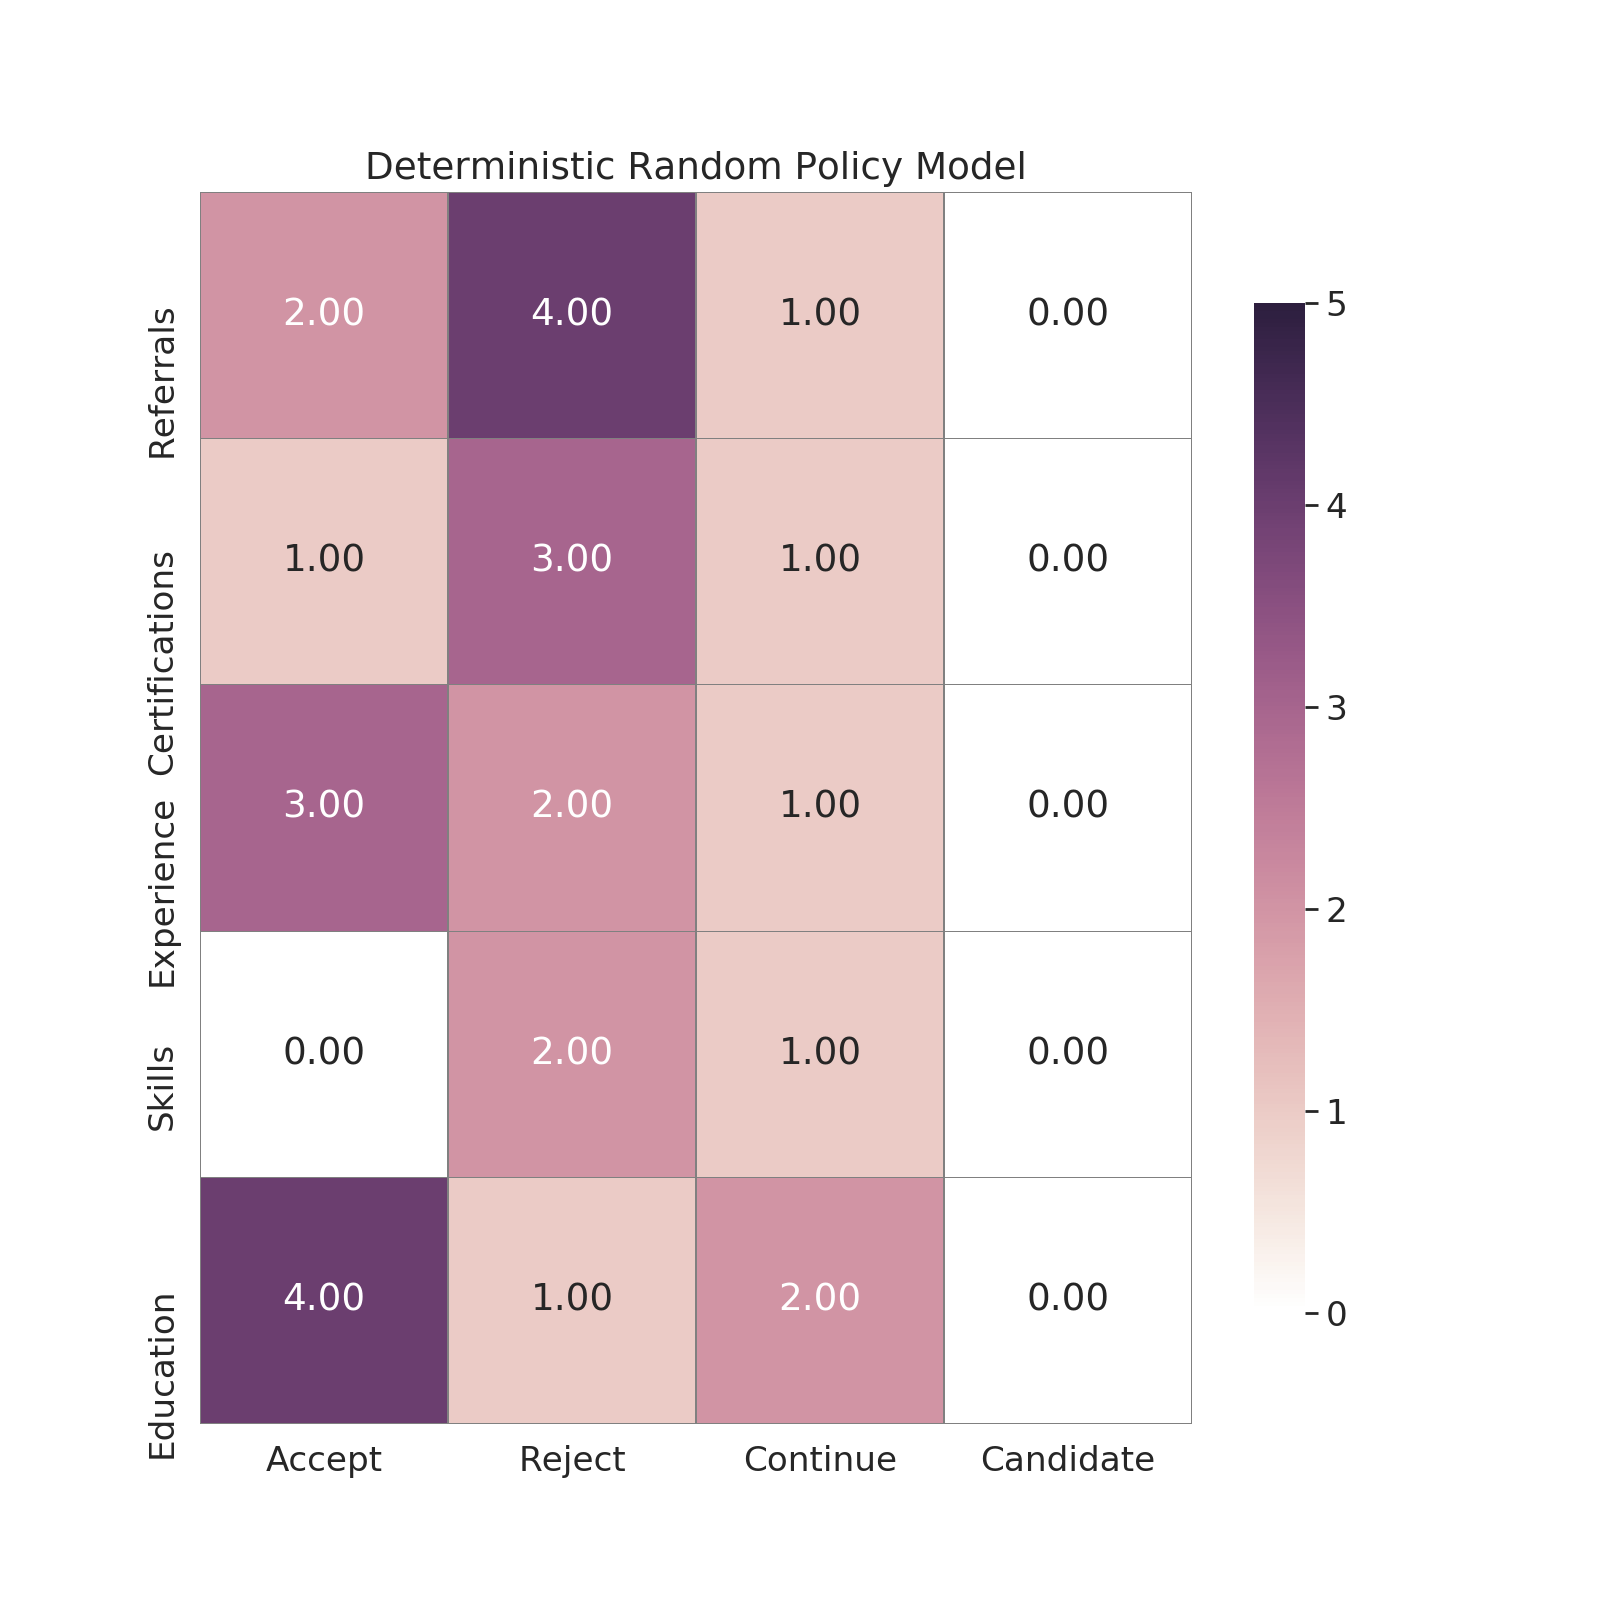

In [136]:
#Heat Map
data = grid2

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Deterministic Random Policy Model')

plt.savefig('Deterministic_Random_Policy_Model.png')              
plt.show()

<IPython.core.display.Javascript object>


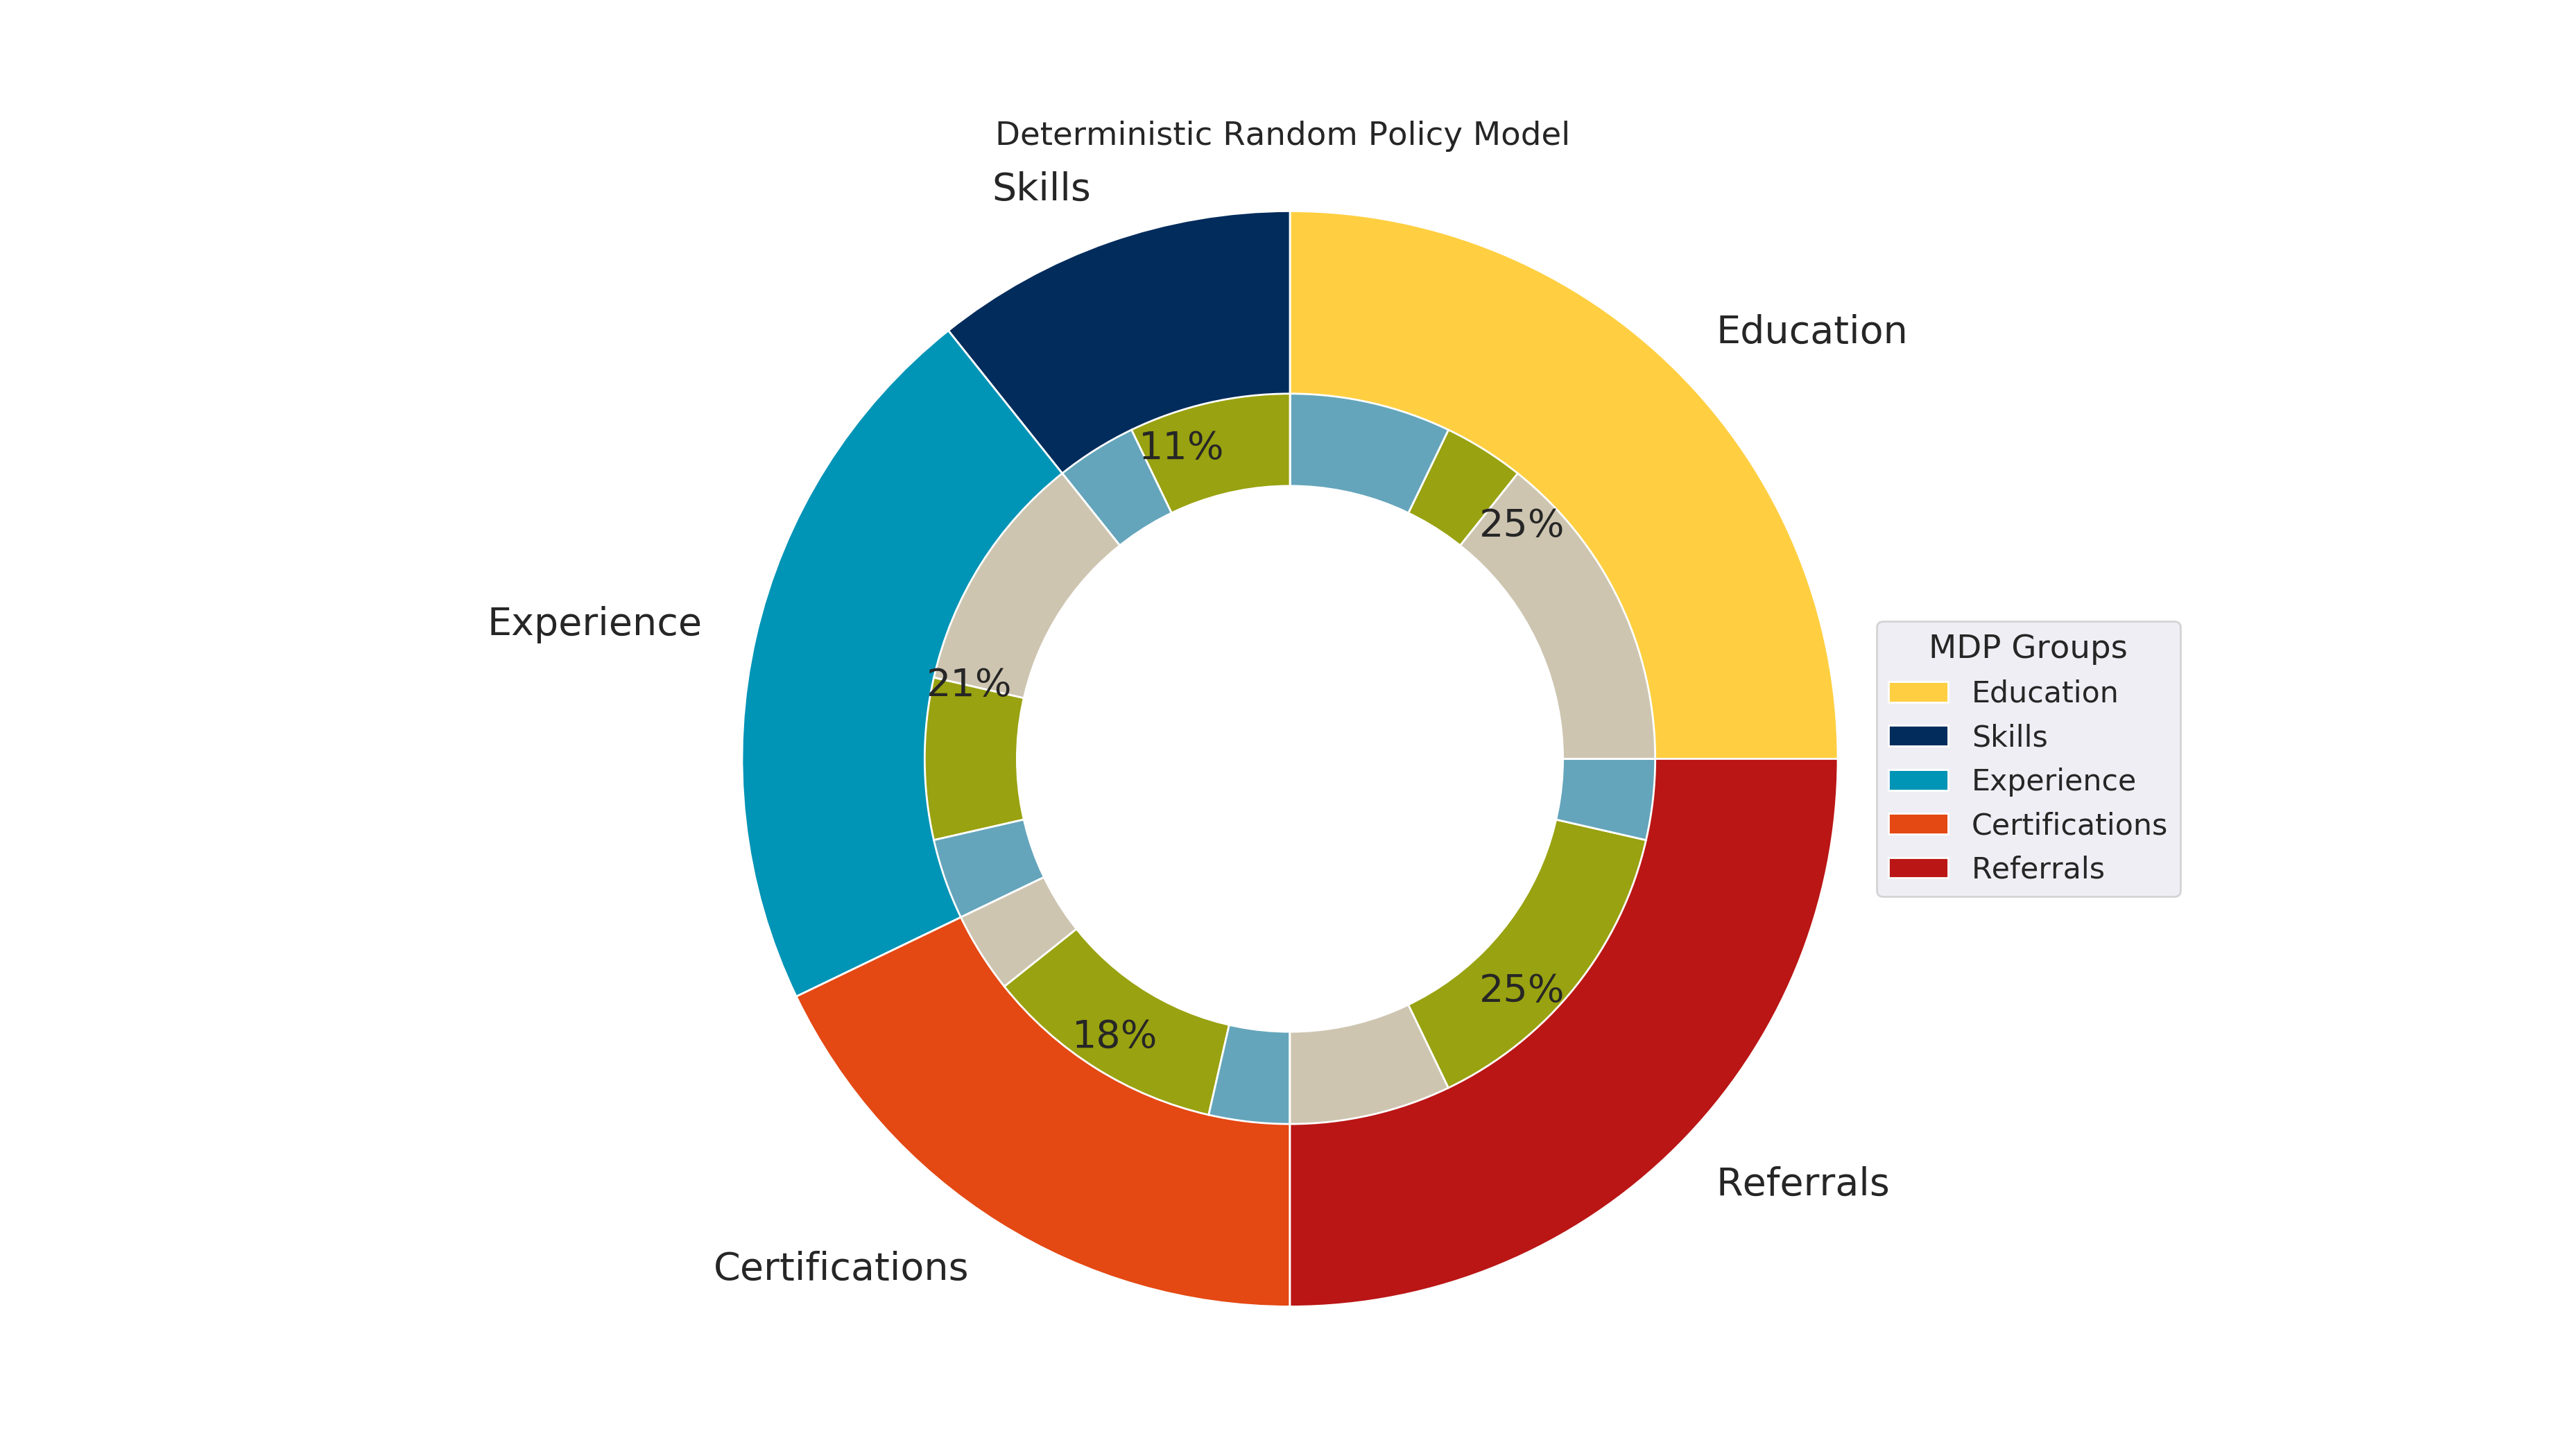

In [137]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(grid2)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Deterministic Random Policy Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Deterministic_Random_Policy_Model_Pie.png')

plt.show()


#### Reward

In [138]:
reward_grid2

[[-1.32, 0.33, -0.66, 0],
 [0, 0.66, -0.33, 0],
 [-0.99, 0.66, -0.33, 0],
 [-0.33, 0.99, -0.33, 0],
 [-0.66, 1.32, -0.33, 0]]

                Accept  Reject  Continue  Candidate
Education        -1.32    0.33     -0.66          0
Skills            0.00    0.66     -0.33          0
Experience       -0.99    0.66     -0.33          0
Certifications   -0.33    0.99     -0.33          0
Referrals        -0.66    1.32     -0.33          0


<IPython.core.display.Javascript object>


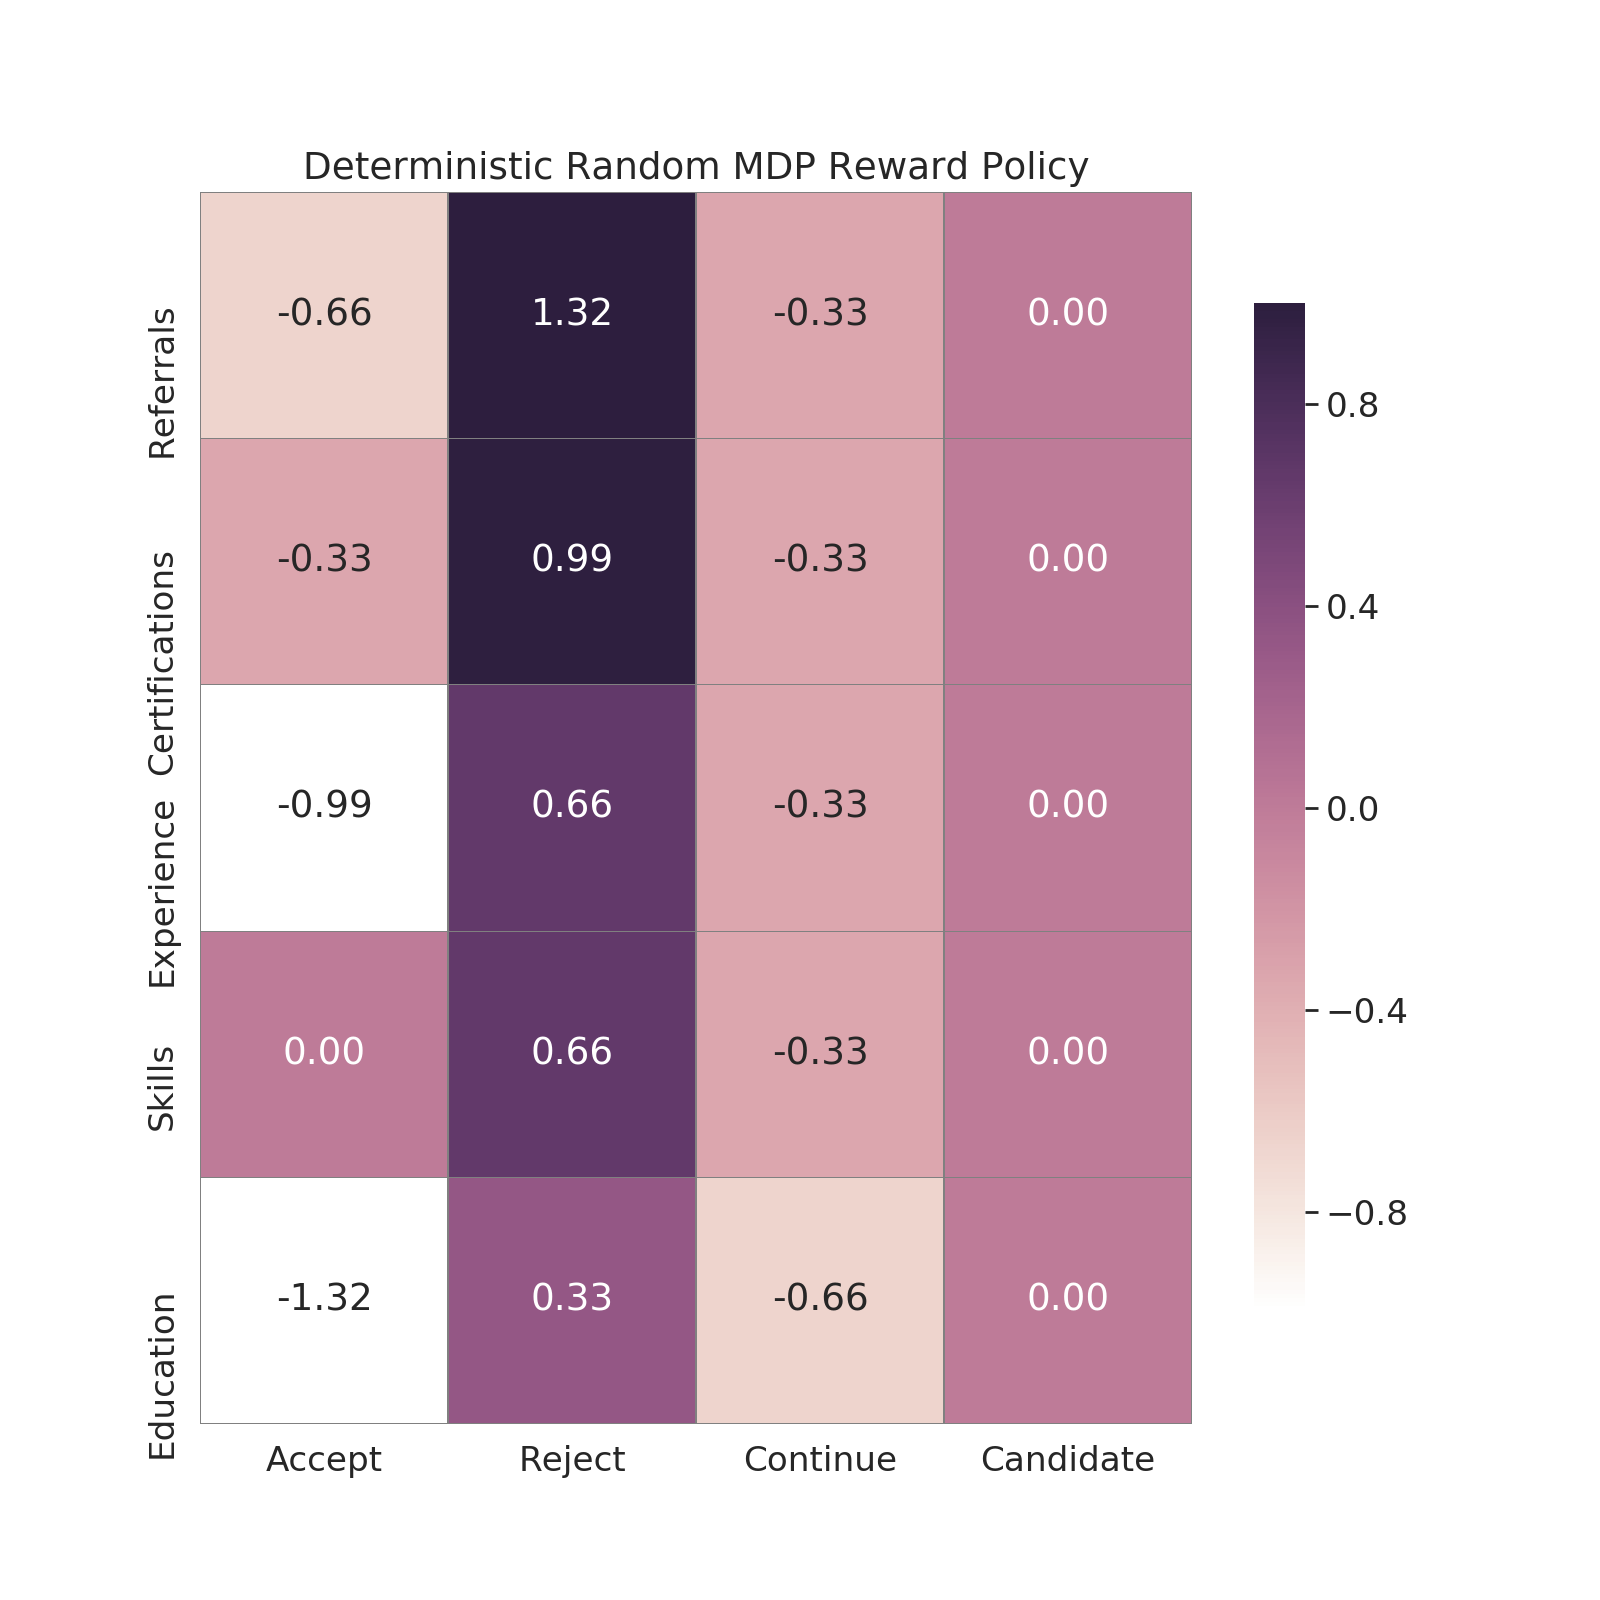

In [139]:

data = reward_grid2

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=-1.0, vmax=1.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Deterministic Random MDP Reward Policy')

plt.savefig('Deterministic_Random_MDP_Reward_Modeling.png')              
plt.show()



<IPython.core.display.Javascript object>


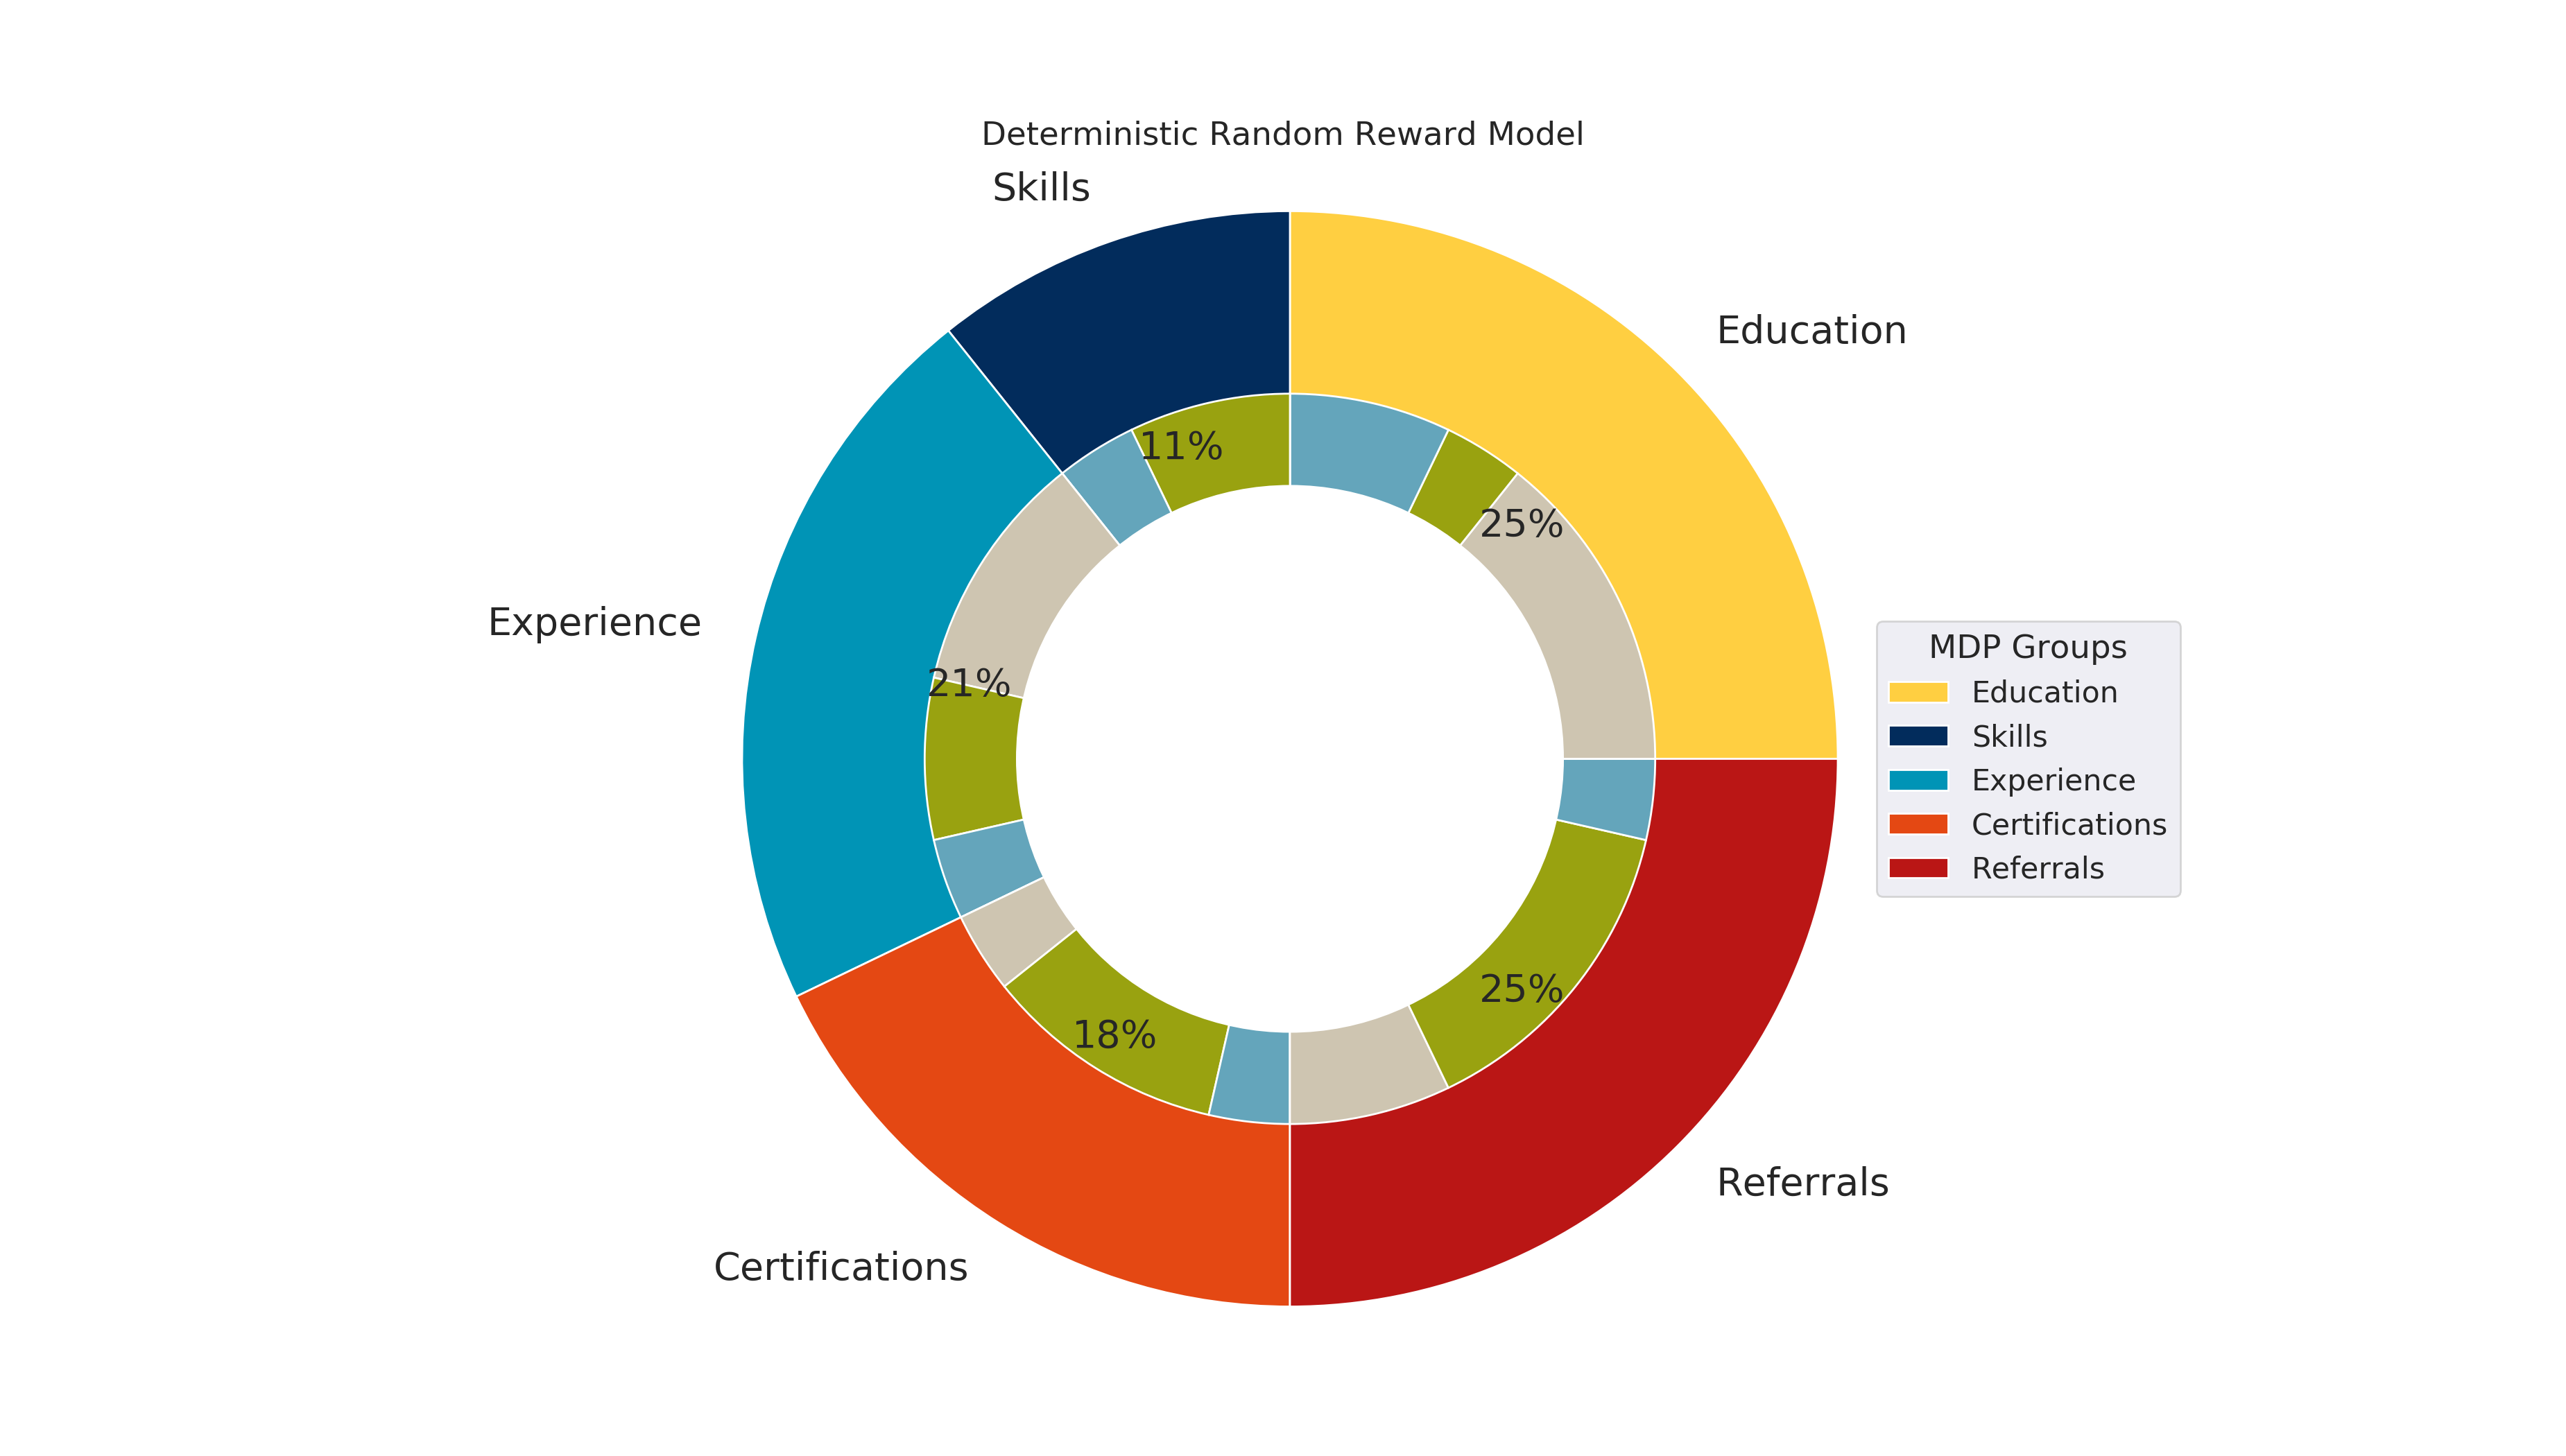

In [140]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(grid2)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Deterministic Random Reward Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Deterministic_Random_Reward_Model_Pie.png')

plt.show()


## User Guided Deterministic MDP

Stochastic

In [15]:

rows = 5
cols = 4
grid = [[0 for i in range(cols)] for i in range(rows)] #2States x 3 Actions

#Keeping track of how reward is calculated
Lev = Levenshtein

#For the reward, I have chosen a gradually increasing reward as the goal is approached with obstacles based on the Lev score
reward = []





print("Decision Modeling MDP Choice Game")
print("===========================================")
print("Follow the prompted Instructions")
    
def mdp_game():
    r = 0
    
    pi = []
    input_state = int( input("Please Select which criteria you would like to examine.\n Press 1 and hit enter to choose Education.\n Press 2 and hit enter to choose Skills\n Press 3 and hit enter to choose Experience\n Press 4 and hit enter to choose Certifications\n Press 5 and hit enter to choose Referrals") )
    prob = rm.uniform(0, 1)
    print(prob)
            
            
    if (prob > .2):
        state = input_state #Highest chance of following the state chosen
        print("In STATE", state)
    else:
        if(prob > .7): #
            state = rm.randint(3,5) #more likely to look at referrals, certifications, experience
            print("In STATE", state)
        else:
            state = rm.randint(1,5)
            print("In STATE", state)
   
    if( state == 1):
        
        print("You have selected Education.\n")
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a') ):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[0][0] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[0][1] += 1
            
            
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid[0][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[0][3] += 1
            
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            

            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
        else:
            print("Invalid Action Chosen!")
      
    elif( state == 2):
        print( "You have selected Skills.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[1][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[1][1] += 1
            

            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid[1][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[1][3] += 1
            
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            

            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 3):
        
        print( "You have selected Experience.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[2][0] += 1
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[2][1] += 1
            

            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid[2][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[2][3] += 1
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 4):
        print( "You have selected Certifications.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[3][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[3][1] += 1
            
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid[3][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[3][3] += 1
            
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            

            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 5):
        print( "You have selected Referral.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[4][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[4][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid[4][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            
            grid[4][3] += 1
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
        else:
            print("Invalid Action Chosen!")

    else:
        print("Invalid choice!")        
    print("Reward: ", reward)
    
    
def candidates(choice):

    if choice == 1:
        print("You have chosen Candidate 1:")
        mdp_game()
    elif choice == 2:
        print("You have chosen Candidate 2:")
        mdp_game()
    elif choice == 3:
        print("You have chosen Candidate 3:")
        mdp_game()
    
    
while True:
        print("STARTING GAME")
        choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
        candidates(choice)
        restart = input('do you want to restart Y/N?')
        if restart == 'N' or restart == 'n':
            print("GAME OVER")
            break
        elif restart == 'Y' or restart == 'y':
            print("NEW GAME")
    
            
print("StatesxActions Grid: ", grid)
print("reward:", sum(reward))
print("reward Summed Array:", (reward))


Decision Modeling MDP Choice Game
Follow the prompted Instructions
STARTING GAME
Please Select which candidate you would like to examine .
 Press 1 and hit enter.
 Press 2 and hit enter.
 Press 3 and hit enter.
1
You have chosen Candidate 1:
Please Select which criteria you would like to examine.
 Press 1 and hit enter to choose Education.
 Press 2 and hit enter to choose Skills
 Press 3 and hit enter to choose Experience
 Press 4 and hit enter to choose Certifications
 Press 5 and hit enter to choose Referrals2
0.8242582319844052
In STATE 2
You have selected Skills.


Which action would you like to take?
 A) Examine Another Section
 B) Accept the Candidate's Application
 C) Decline the Candidate's Application 

Enter A or B or C:
 
Which action would you like to accomplish to the candidate's application? 
 A) Accept
 B) Decline
 C) Review
 Enter A or B or C:c
You have chosen to continue viewing the candidate's application
Continue
Please Select which criteria you would like to examine

# 3 Visualizations Stochastic of U-D MDP (Heat Map, Donut Pie, Radial Plot)


                Accept  Reject  Continue  C1andidate
Education            1       0         3           0
Skills               1       0         1           0
Experience           0       0         0           2
Certifications       0       1         0           0
Referrals            0       0         0           0


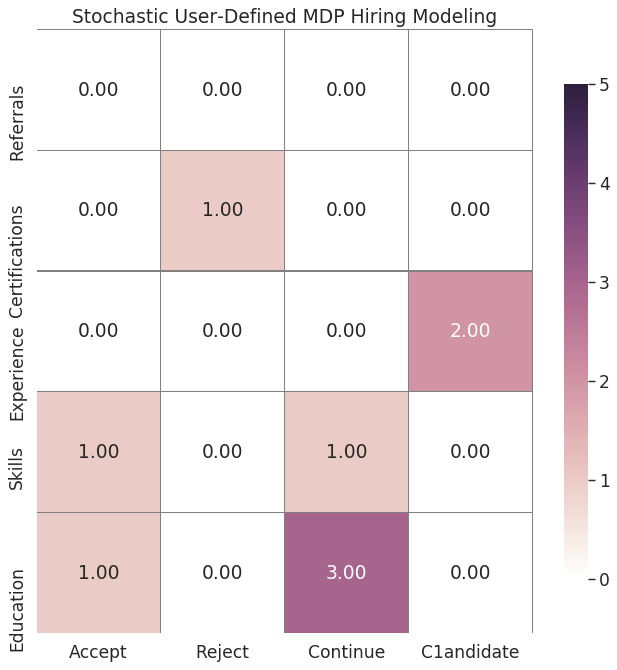

In [16]:
#Heat Maps
states_grid = grid
data = states_grid 

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'C1andidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Stochastic User-Defined MDP Hiring Modeling')

plt.savefig('Stochastic_User-Defined_MDP_Hiring_Modeling.png')              
plt.show()

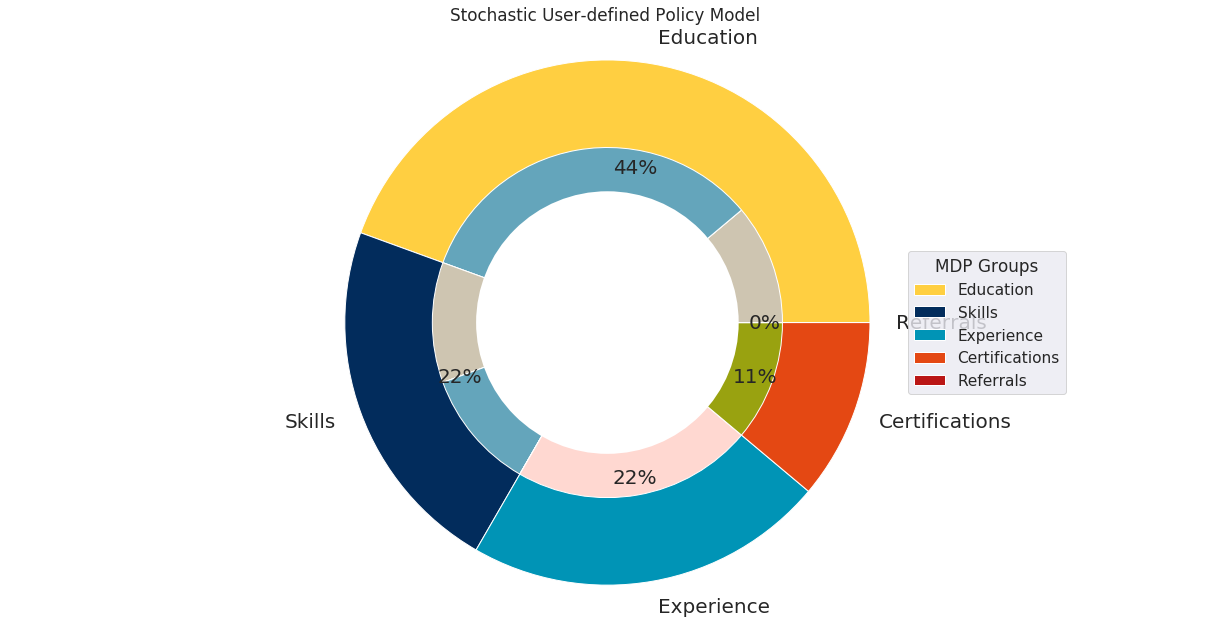

In [17]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(data)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Stochastic User-defined Policy Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Stochastic_User-defined_Policy_Model_Pie.png')

plt.show()


In [143]:
#Radial Plots
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'Candidate': ['A','B','C','D'],
'Education': [1.0, 0, 1.0, 0],
'Skills': [0, 0, 1, 0],
'Experience': [0, 0, 0, 0],
'Certifications': [0, 0, 1, 0],
'Referrals': [0, 2, 1, 0]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4], ["2","4"], color="black", size=4)
plt.ylim(0,5)
 

# Add plots
 
# Plot each individual 
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Candidate').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Candidate A")
ax.fill(angles, values, 'b', alpha=0.1) #color
 
# Ind2
values=df.loc[1].drop('Candidate').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Candidate B")
ax.fill(angles, values, 'r', alpha=0.1) #color
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.001))

# Show the graph
plt.show()

Deterministic

In [11]:

rows = 5
cols = 4
grid = [[0 for i in range(cols)] for i in range(rows)] #2States x 3 Actions
reward_grid = [[0 for i in range(cols)] for i in range(rows)] #2States x 3 Actions

#Keeping track of how reward is calculated
Lev = Levenshtein

#For the reward, I have chosen a gradually increasing reward as the goal is approached with obstacles based on the Lev score
reward = []





print("Decision Modeling MDP Choice Game")
print("===========================================")
print("Follow the prompted Instructions")
    
def mdp_game():
    r = 0
    
    pi = []
    state = int( input("Please Select which criteria you would like to examine.\n Press 1 and hit enter to choose Education.\n Press 2 and hit enter to choose Skills\n Press 3 and hit enter to choose Experience\n Press 4 and hit enter to choose Certifications\n Press 5 and hit enter to choose Referrals") )       

    if( state == 1):
        
        print("You have selected Education.\n")
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a') ):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[0][0] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            reward_grid[0][0] += r
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[0][1] += 1
            
            
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            reward_grid[0][1] += r  
            
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid[0][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            reward_grid[0][2] += r 
            
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[0][3] += 1
            
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            

            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[0][3] += r   
            
        else:
            print("Invalid Action Chosen!")
      
    elif( state == 2):
        print( "You have selected Skills.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[1][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[1][0] += r 
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[1][1] += 1
            

            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid[1][1] += r 

                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid[1][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1

            reward_grid[1][2] += r 

        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[1][3] += 1
            
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            

            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[1][3] += r 
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 3):
        
        print( "You have selected Experience.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[2][0] += 1
            #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[2][0] += r 
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[2][1] += 1
            

            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[2][1] += r 
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            grid[2][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[2][2] += r 
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[2][3] += 1
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[2][3] += r 
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 4):
        print( "You have selected Certifications.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[3][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[3][0] += r 
                
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[3][1] += 1
            
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[3][1] += r 
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid[3][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[3][2] += r 
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            grid[3][3] += 1
            
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            

            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid[3][3] += r 
            
        else:
            print("Invalid Action Chosen!")
            
    elif( state == 5):
        print( "You have selected Referral.\n" )
        
        print("\nWhich action would you like to take?")
        print(" A) Examine Another Section\n B) Accept the Candidate's Application\n C) Decline the Candidate's Application \n\nEnter A or B or C:\n ")

        action = input("Which action would you like to accomplish to the candidate's application? \n A) Accept\n B) Decline\n C) Review\n Enter A or B or C:")

        if( action == ('A') or action == ('a')):
            print("You have chosen to accept the candidate's application")
            print("Accept")
            
            grid[4][0] += 1
            
        #Keeping track of reward
            if( Lev >= 75):
                r += 1
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
            
            reward_grid[4][0] += r 
            
        elif( action == ("B") or action == ("b") ):
            print( "You have chosen to decline the candidate's application" )
            print("Decline")
           
            grid[4][1] += 1
            
            #Keeping track of reward
            if( Lev >= 75):
                r -= 1
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[4][1] += r 
                
        elif( action == ("C") or action == ("c") ):
            print( "You have chosen to continue viewing the candidate's application" )
            print("Continue")
            
            grid[4][2] += 1
            mdp_game()
            
            #Keeping track of reward
            if( Lev >= 50):
                r += .33
                reward.append(r)
                reward[0] += 1
            else:
                r -= .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[4][2] += r 
                
        elif( action == ("D") or action == ("d") ):
            print( "You have decided to view another Candidate" )
            
            grid[4][3] += 1
            choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
            candidates(choice) 
            
            #Keeping track of reward
            if( Lev >= 50):
                r -= .33
                reward.append(r)
                reward[0] += 1
            else:
                r += .33
                reward.append(r)
                reward[0] += 1
                
            reward_grid[4][3] += r 
            
        else:
            print("Invalid Action Chosen!")

    else:
        print("Invalid choice!")        
    print("Reward: ", reward)
    
    
def candidates(choice):

    if choice == 1:
        print("You have chosen Candidate 1:")
        #Lev = Lev1
        #mdp_game(lev)
        mdp_game()
    elif choice == 2:
        print("You have chosen Candidate 2:")
        #Lev = Lev1
        #mdp_game(lev)
        mdp_game()
    elif choice == 3:
        print("You have chosen Candidate 3:")
        #Lev = Lev1
        #mdp_game(lev)
        mdp_game()
    
    
while True:
        print("STARTING GAME")
        choice = int( input("Please Select which candidate you would like to examine .\n Press 1 and hit enter.\n Press 2 and hit enter.\n Press 3 and hit enter.\n"))
        candidates(choice)
        restart = input('do you want to restart Y/N?')
        if restart == 'N' or restart == 'n':
            print("GAME OVER")
            break
        elif restart == 'Y' or restart == 'y':
            print("NEW GAME")
    
            
print("StatesxActions Grid: ", grid)
print("StatesxActions Reward Grid: ", reward_grid)
print("reward:", sum(reward))
print("reward Summed Array:", (reward))


Decision Modeling MDP Choice Game
Follow the prompted Instructions
STARTING GAME
Please Select which candidate you would like to examine .
 Press 1 and hit enter.
 Press 2 and hit enter.
 Press 3 and hit enter.
1
You have chosen Candidate 1:
Please Select which criteria you would like to examine.
 Press 1 and hit enter to choose Education.
 Press 2 and hit enter to choose Skills
 Press 3 and hit enter to choose Experience
 Press 4 and hit enter to choose Certifications
 Press 5 and hit enter to choose Referrals2
You have selected Skills.


Which action would you like to take?
 A) Examine Another Section
 B) Accept the Candidate's Application
 C) Decline the Candidate's Application 

Enter A or B or C:
 
Which action would you like to accomplish to the candidate's application? 
 A) Accept
 B) Decline
 C) Review
 Enter A or B or C:a
You have chosen to accept the candidate's application
Accept
Reward:  [0.6699999999999999]
do you want to restart Y/N?y
NEW GAME
STARTING GAME
Please Select 

You have selected Referral.


Which action would you like to take?
 A) Examine Another Section
 B) Accept the Candidate's Application
 C) Decline the Candidate's Application 

Enter A or B or C:
 
Which action would you like to accomplish to the candidate's application? 
 A) Accept
 B) Decline
 C) Review
 Enter A or B or C:a
You have chosen to accept the candidate's application
Accept
Reward:  [7.67, 0.33, 0.33, 0.33, -0.33, -0.33, -0.33, -0.33]
Reward:  [8.67, 0.33, 0.33, 0.33, -0.33, -0.33, -0.33, -0.33, 0.33]
Reward:  [9.67, 0.33, 0.33, 0.33, -0.33, -0.33, -0.33, -0.33, 0.33, -0.33]
Reward:  [10.67, 0.33, 0.33, 0.33, -0.33, -0.33, -0.33, -0.33, 0.33, -0.33, -0.33]
do you want to restart Y/N?n
GAME OVER
StatesxActions Grid:  [[0, 0, 0, 1], [1, 0, 1, 0], [0, 1, 2, 0], [0, 0, 2, 0], [1, 0, 0, 2]]
StatesxActions Reward Grid:  [[0, 0, 0, 0.33], [-0.33, 0, -0.33, 0], [0, 0.33, -0.66, 0], [0, 0, -0.66, 0], [-0.33, 0, 0, 0.66]]
reward: 10.01
reward Summed Array: [10.67, 0.33, 0.33, 0.33, -0

### 3 Visualizations  of deterministic U-D MDP (Heat Map, Donut Pie, Radial Plots)

##### States

                Accept  Reject  Continue  Candidate
Education            0       0         0          1
Skills               1       0         1          0
Experience           0       1         2          0
Certifications       0       0         2          0
Referrals            1       0         0          2


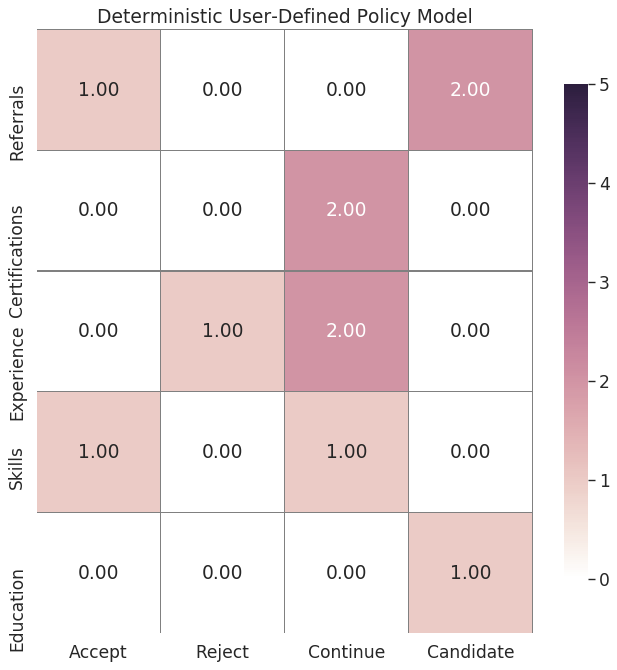

In [12]:
states_grid = grid
data = states_grid 

length = max(map(len, data))

y=np.array([xi+[None]*(length-len(xi)) for xi in data])

df = pd.DataFrame(data=data,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=0.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Deterministic User-Defined Policy Model')

plt.savefig('Deterministic_User_Defined_Policy_Model.png')              
plt.show()

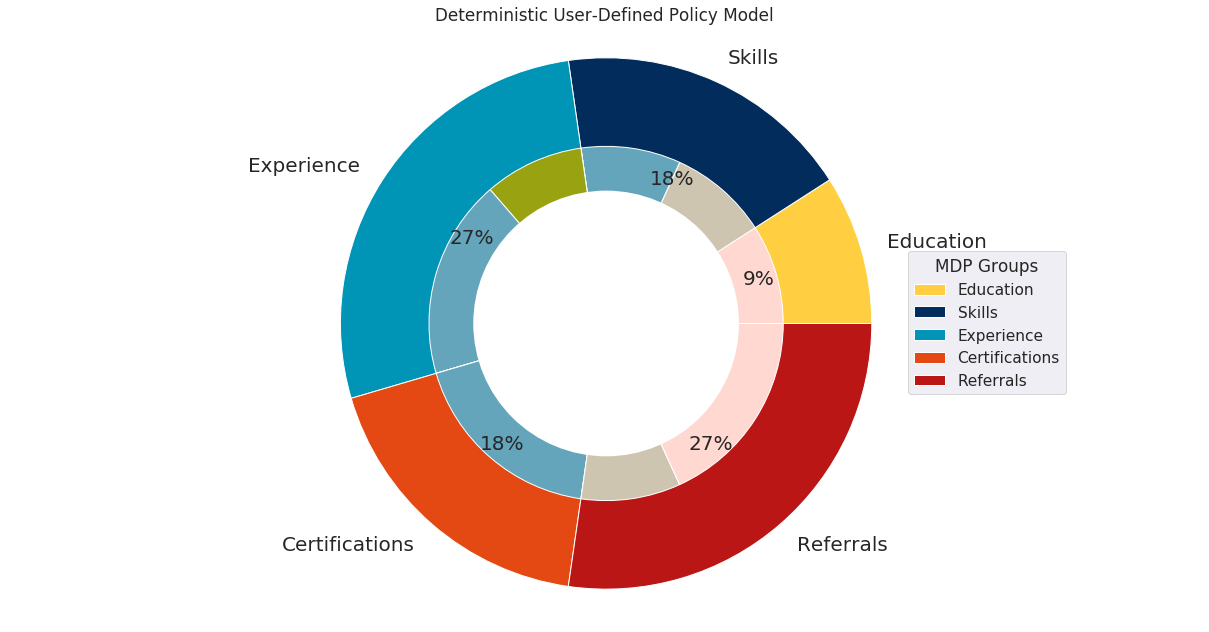

In [13]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(data)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Deterministic User-Defined Policy Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Deterministic_User_Defined_Policy_Model_Pie.png.png')

plt.show()
 


In [145]:
#Radial Plots
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'Candidate': ['A','B','C','D'],
'Education': [3.8, 1.5, 3.0, 4],
'Skills': [2.9, .1, .9, 3.4],
'Experience': [.8, 3.9, 2.3, 2.4],
'Certifications': [.7, 3.1, 3.3, 1.4],
'Referrals': [2.8, 1.5, 3.2, 1.4]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8,10], ["2","4","6","8","10"], color="black", size=7)
plt.ylim(0,10)
 

# Add plots
 
# Plot each individual 
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Candidate').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Candidate A")
ax.fill(angles, values, 'b', alpha=0.1) #color
 
# Ind2
values=df.loc[1].drop('Candidate').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Candidate B")
ax.fill(angles, values, 'r', alpha=0.1) #color
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.001))

# Show the graph
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### Reward 

In [146]:

length = max(map(len, reward_grid))

y=np.array([xi+[None]*(length-len(xi)) for xi in reward_grid])

df = pd.DataFrame(data=reward_grid,columns=['Accept','Reject','Continue', 'Candidate'], index=['Education','Skills', 'Experience', 'Certifications', 'Referrals'])
print(df)

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.set(font_scale=1.4)

res = sns.heatmap(df, annot=True, vmin=-2.0, vmax=5.0, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.invert_yaxis()

plt.title('Deterministic User-Defined Reward Model')

plt.savefig('Deterministic_User_Defined_Reward_Model_Map.png')              
plt.show()

AssertionError: 4 columns passed, passed data had 5 columns

In [ ]:
#Donut Chart

fig, ax = plt.subplots()

size = 1.75
vals = np.array(grid2)


topic = ['Education','Skills','Experience','Certifications','Referrals']
action = ['Accept', 'Decline', 'Continue', 'Candidate']

outer_label = list(topic)
inner_label = list(action)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

explode = (0.2,0.2,0.2,0.2,0.2) 


colors = ['#ffcf41', '#022c5c', '#0094b6', '#e44813', '#ba1615']
colors_actions = ['#cec5b1','#99a210', '#64a5bb','#ffd8d1']

ax.pie(vals.sum(axis=1), labels = outer_label, radius=3, colors=colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', textprops={'fontsize': 20})

ax.pie(vals.flatten(), radius=2, colors=colors_actions)

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set(aspect="auto", title='Deterministic User-Defined Reward Model')

plt.axis('equal')
plt.tight_layout()

#Create the legend
ax.legend(outer_label, 
          title ="MDP Groups", 
          loc ="center left", 
          bbox_to_anchor =(.75, 0, 0.5, 1)) 

fig.set_size_inches(18.5, 10.5)

plt.savefig('Deterministic_User-Defined_Policy_Model_Pie.png.png')

plt.show()
 

plt.savefig('Deterministic_User_Defined_Reward_Model_Pie.png', bbox_inches='tight')  
plt.show()